# **House flipping Assignment**

In [1]:
# import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib
import statsmodels
import pylab as py
import scipy
import scipy.stats as stats

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [2]:
#increase font size of all elements of seaborn fonts to make reading easier
sns.set(font_scale=1.5)
# see the data with all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',500)
pd.set_option('display.width', 1000)

In [3]:
# read data into a first data frame
house = pd.read_csv("C:\\Users\\Adyasha\\Downloads\\upgrad_assigmnet_3\\train.csv")

In [4]:
#display basic statistical information for the data
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    24.689725     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    20.000000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   168.000000    68.000000       0.00000

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
house.shape

(1460, 81)

# 2. Data Cleaning
## 2.1 Missing values

In [7]:
# check if any missing values are present in the data
house.isnull().sum().sum()

6965

In [8]:
# display the column names that have missing values
house.columns[house.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [9]:
# check the amount of missing values in the columns
columns_nan =  house.columns[house.isnull().any()]

for c in columns_nan:
    print(c, house[c].isnull().sum())

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [10]:
#check the percentage of missing data to make decisions on working with the missing data
nullval = pd.DataFrame(round(house.isnull().sum()/len(house.index)*100,2).sort_values(ascending=False),columns=["Null values in %"])
nullval.index.name = 'Feature names'
nullval.head(10)

Null values in %
Feature names                  
PoolQC                    99.52
MiscFeature               96.30
Alley                     93.77
Fence                     80.75
FireplaceQu               47.26
LotFrontage               17.74
GarageYrBlt                5.55
GarageCond                 5.55
GarageType                 5.55
GarageFinish               5.55

In [11]:
#dropping all columns with 45% and more missing values
for col in columns_nan:
    if house[col].isnull().sum()*100/house.shape[0]>45:
        house.drop(col,1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [12]:
house.shape

(1460, 76)

The five columns discussed above have been dropped

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


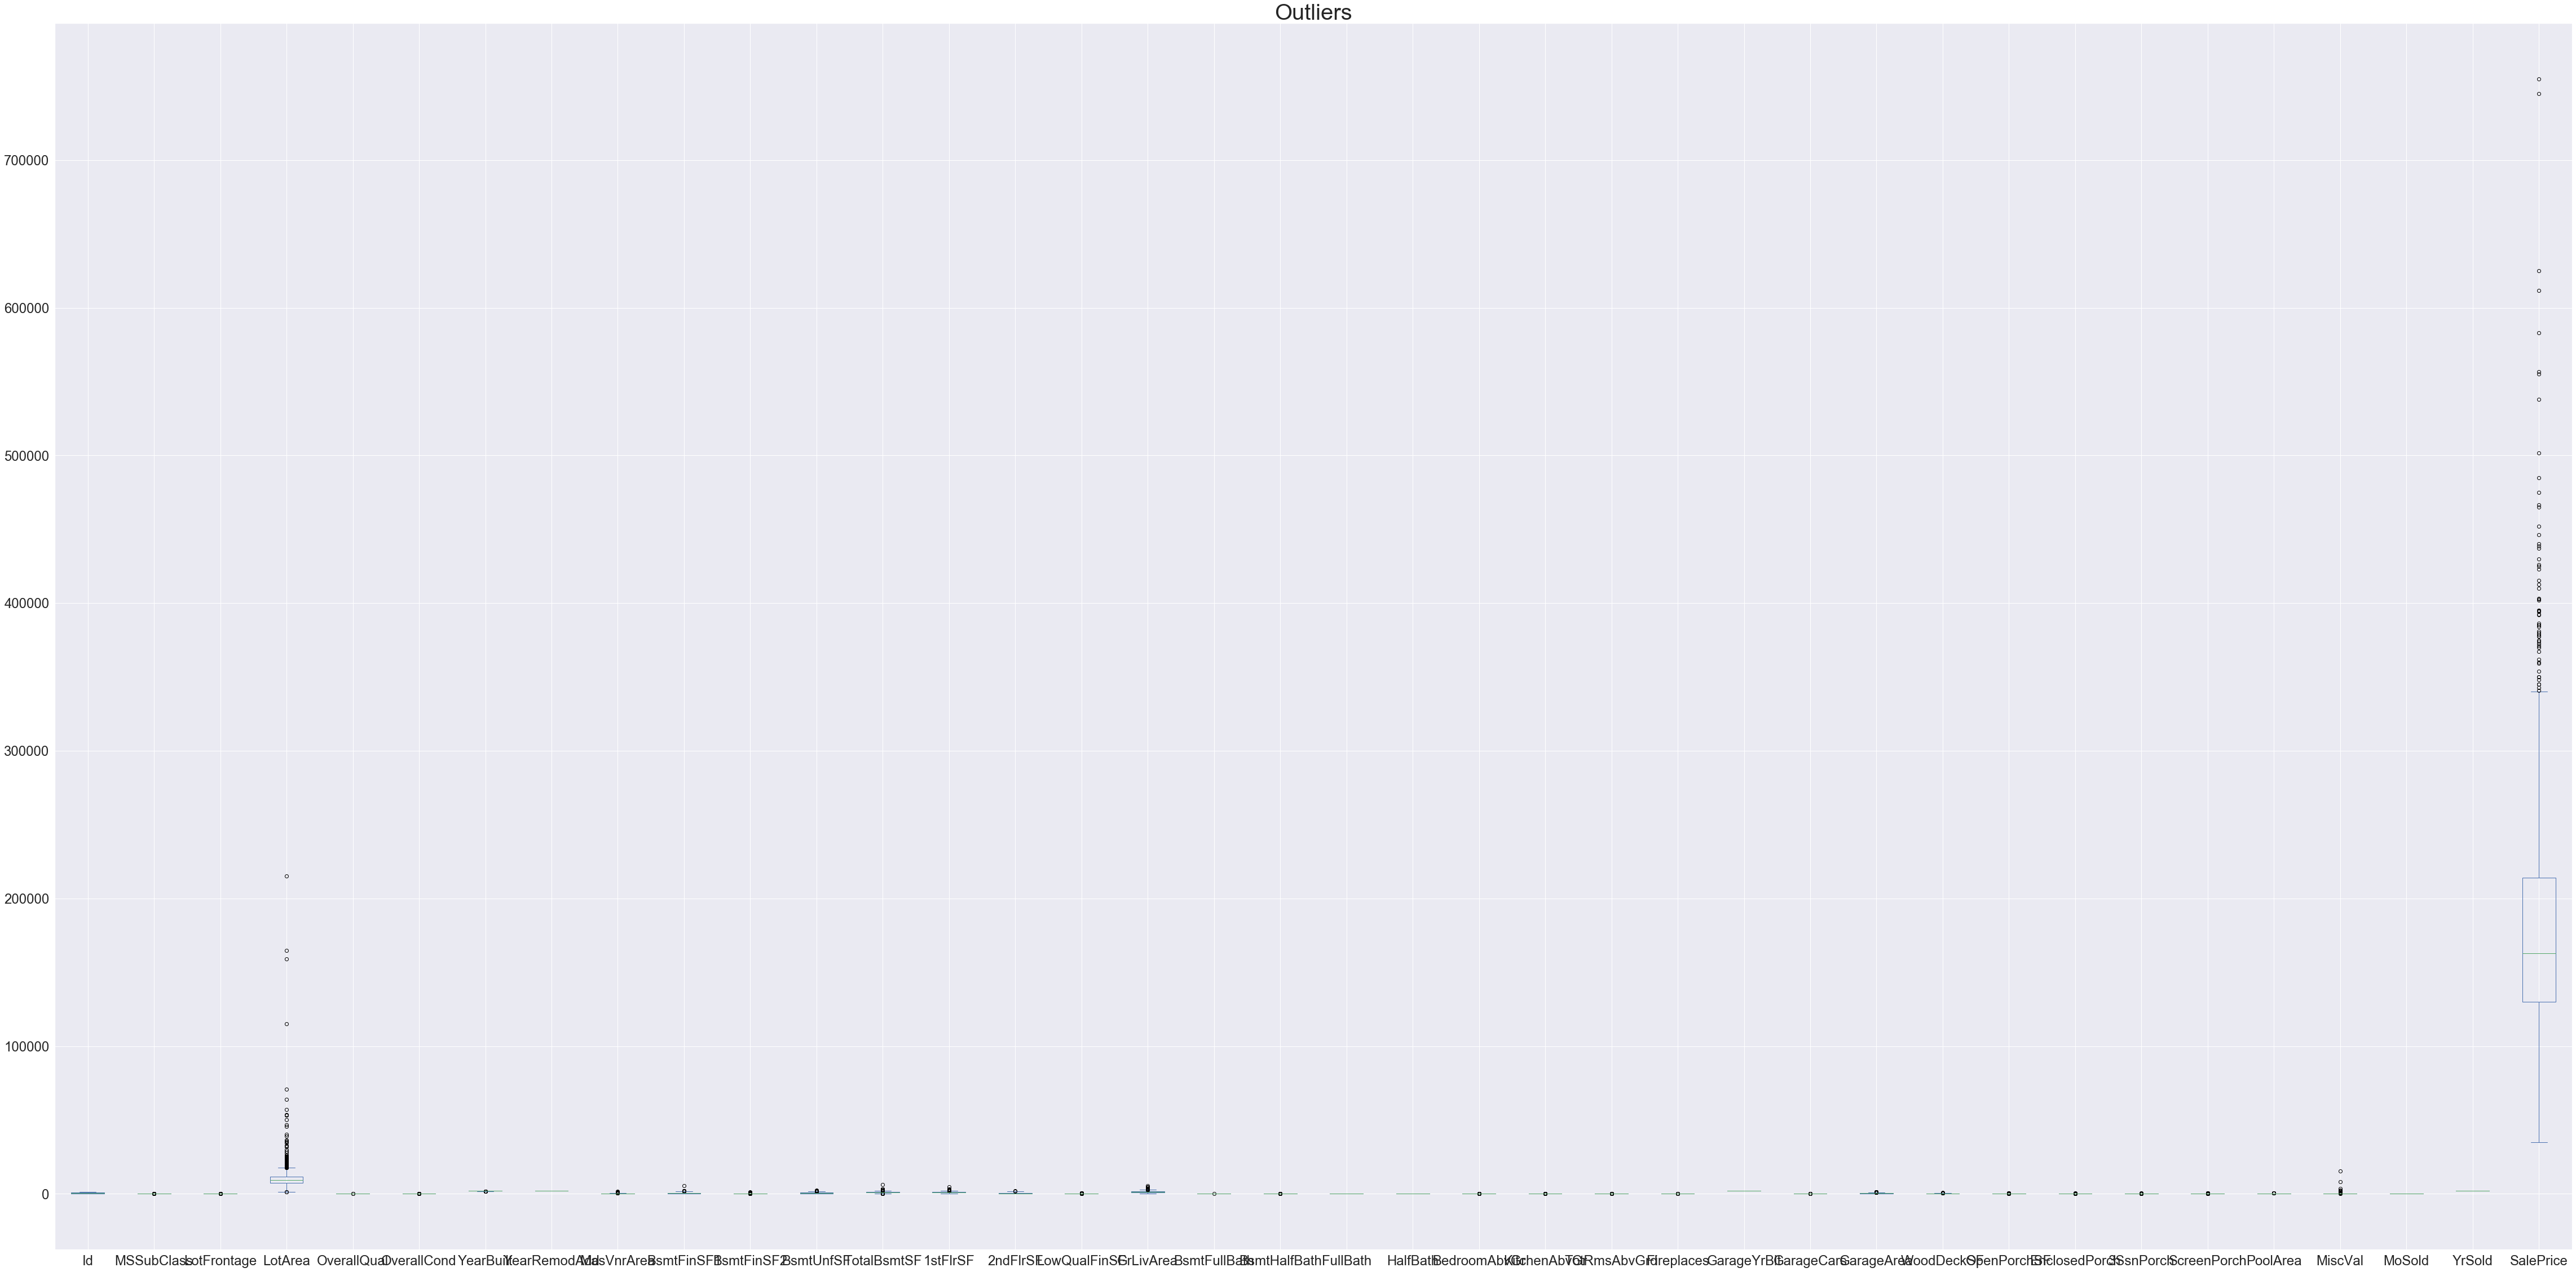

In [13]:
# visualise outliers with boxplot
fig=house.plot.box(title='Outliers', figsize=(80, 40), legend=True, fontsize=24)
fig.axes.title.set_size(40)


The plot shows that the column with the most variation and outliers is the dependant variable, `SalePrice`. `LotArea` has also some outliers

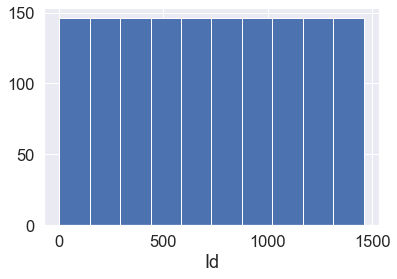

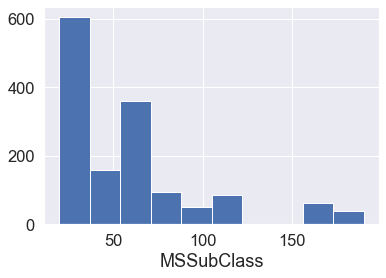

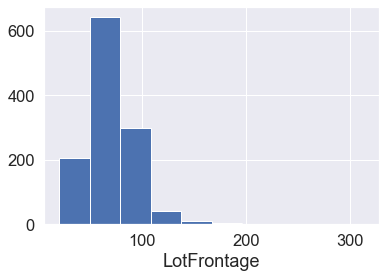

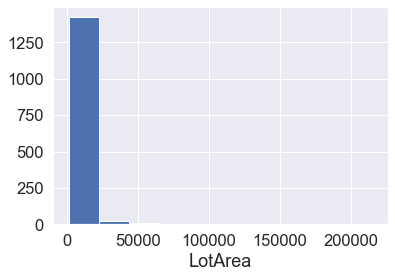

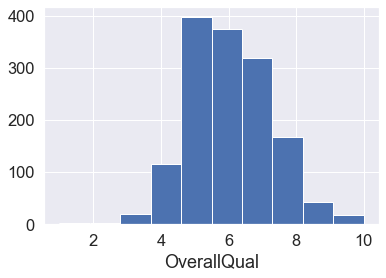

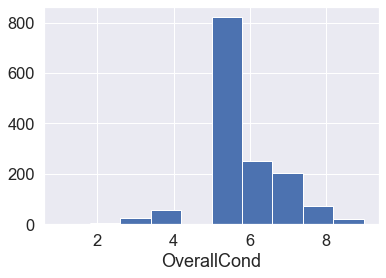

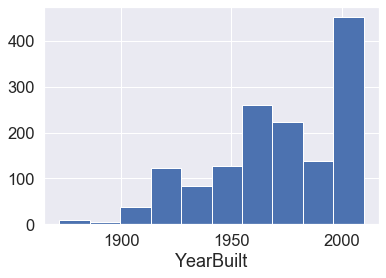

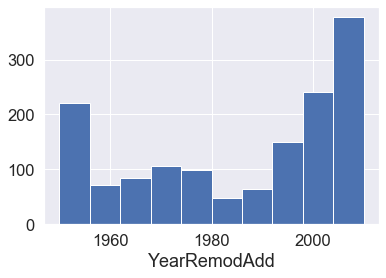

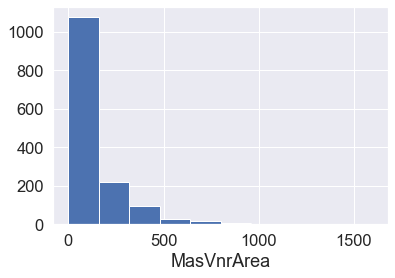

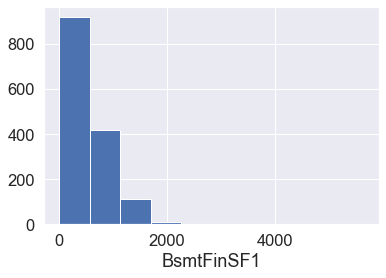

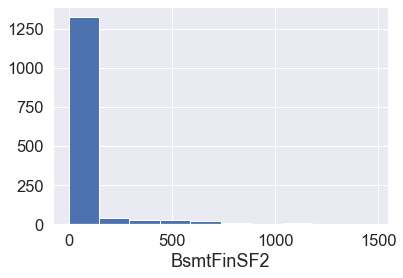

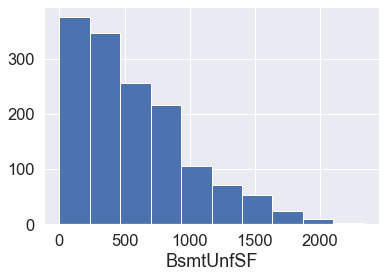

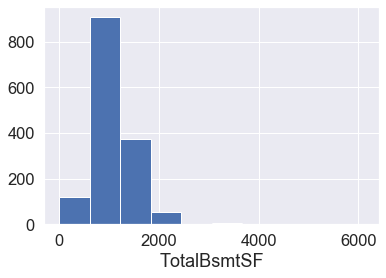

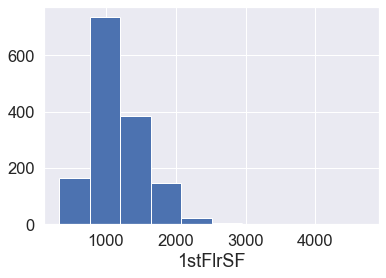

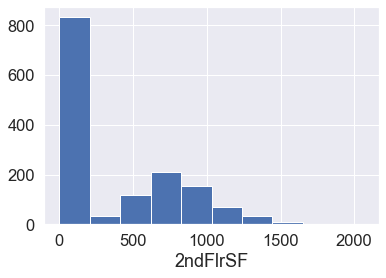

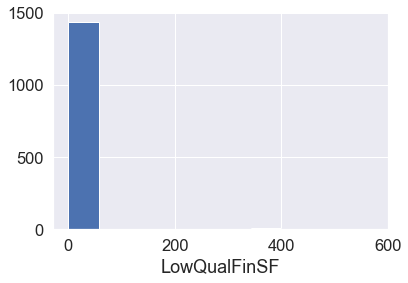

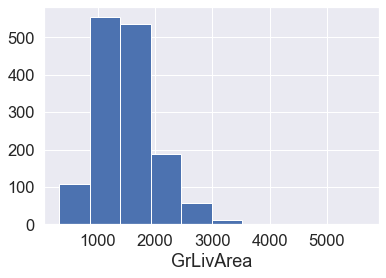

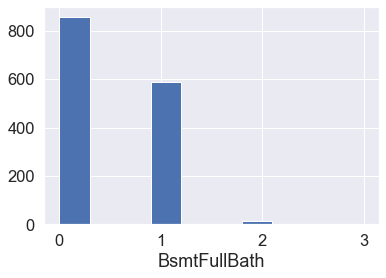

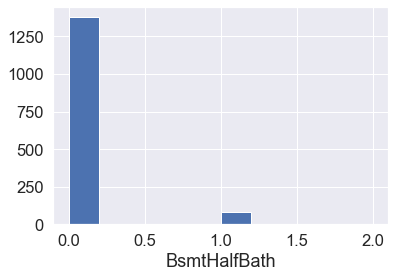

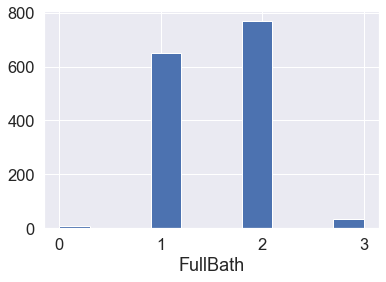

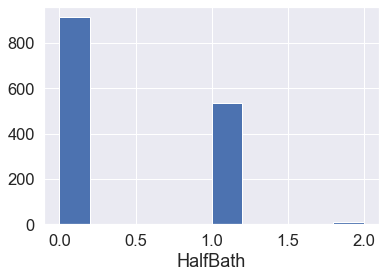

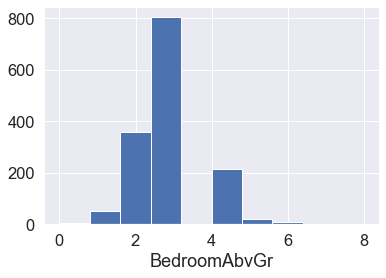

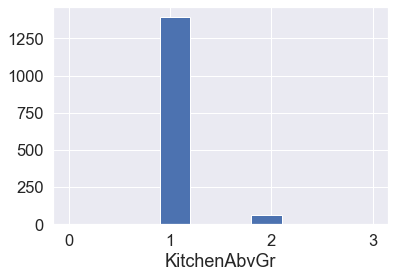

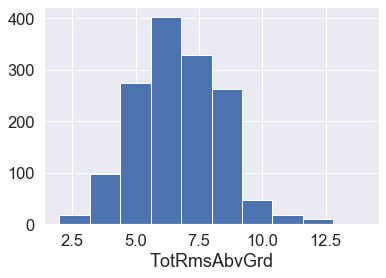

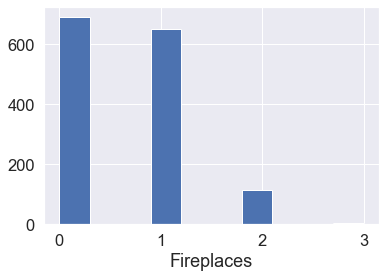

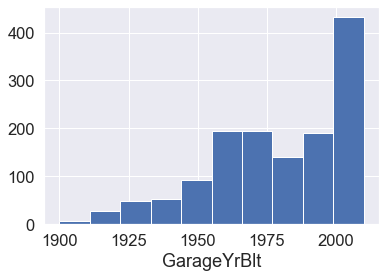

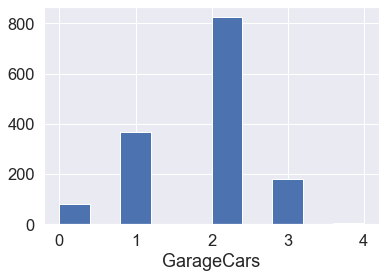

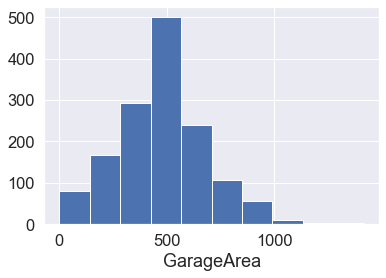

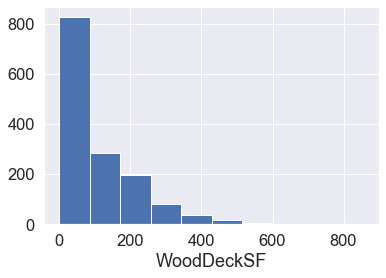

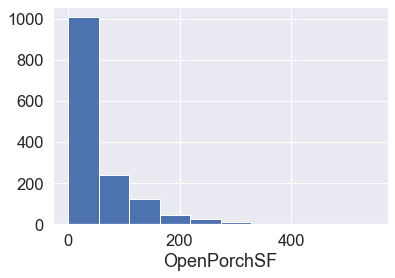

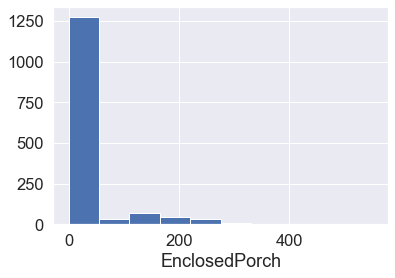

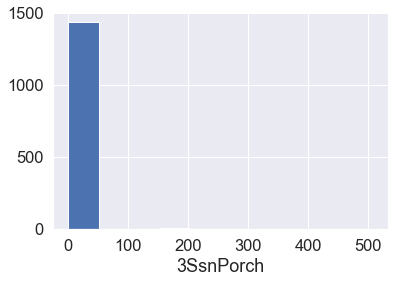

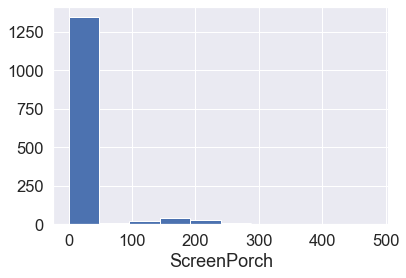

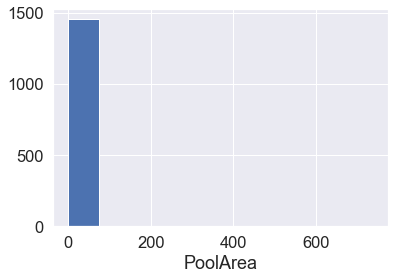

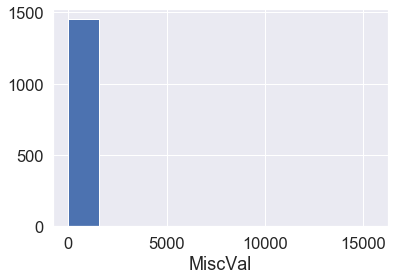

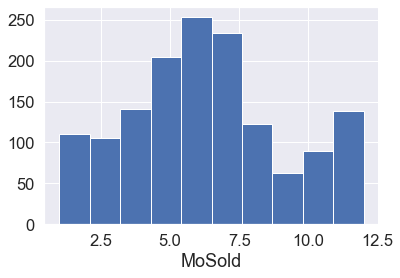

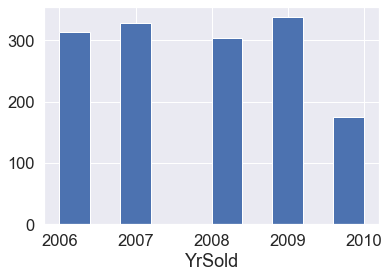

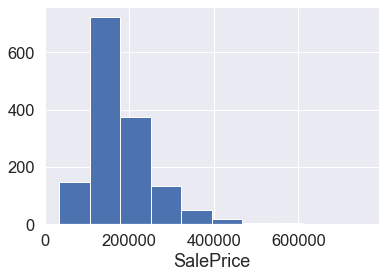

In [14]:
#checking for skewness in numerical data
numerical_features=[feature for feature in house.columns if house[feature].dtypes!='object']
for feature in numerical_features:
    if feature=='class(target)':
        pass
    else:
        house[feature].hist()
        plt.xlabel(feature)
        plt.show()

In [15]:
print(house['LowQualFinSF'].value_counts())
print(house['PoolArea'].value_counts())
print(house['MiscVal'].value_counts())
print(house['3SsnPorch'].value_counts())

0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: LowQualFinSF, dtype: int64
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304 

Printing the value counts confirmed that there is very little variation in value, so that there is not much information that would be added to the regression model with these columns. 
From a business logic standpoint, `PoolArea` is a similar variable to the previously dropped one. This is also the case for `MiscVal` - in additon, it has a rather high number of outliers. `3SsnPorch`appears to be contained in the other porch values. 
They are dropped as a result.

In [16]:
house=house.drop(['LowQualFinSF','PoolArea','MiscVal','3SsnPorch'],axis=1)

In [17]:
house.shape

(1460, 72)

In [18]:
# re-check the amount of missing values in the columns
columns_nan =  house.columns[house.isnull().any()]

for c in columns_nan:
    print(c, house[c].isnull().sum())

LotFrontage 259
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81


In [19]:
#imputing the media
house['LotFrontage']=house['LotFrontage'].fillna(house['LotFrontage'].median())
house['GarageYrBlt']=house['GarageYrBlt'].fillna(house['GarageYrBlt'].median())
house['MasVnrArea']=house['MasVnrArea'].fillna(house['MasVnrArea'].median())


In [20]:
#categorical values: imputing the mode
for col in ('MasVnrType', 'GarageCond', 'GarageType', 'GarageFinish','GarageQual','BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual', 'Electrical'):
    
    house[col] = house[col].fillna(house[col].mode()[0])

In [21]:
# checking for the presence of any more null values
house.isnull().values.any()

False

## 2.2 Outlier detection

C:\Users\Adyasha\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: F

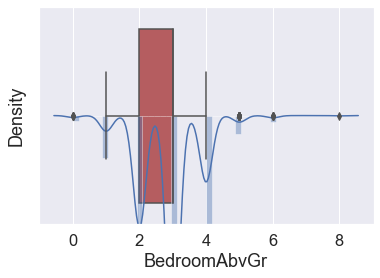

In [22]:
plt.figure()
sns.distplot(house['BedroomAbvGr'],color='b')
sns.boxplot(house['BedroomAbvGr'],color='r')
plt.show()

C:\Users\Adyasha\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: F

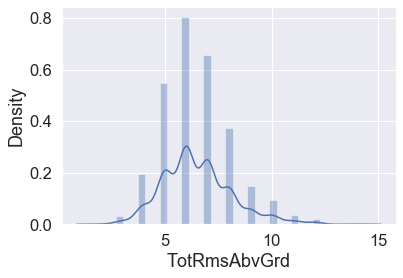

In [23]:
plt.figure()
sns.distplot(house['TotRmsAbvGrd'],color='b')
plt.show()

C:\Users\Adyasha\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: F

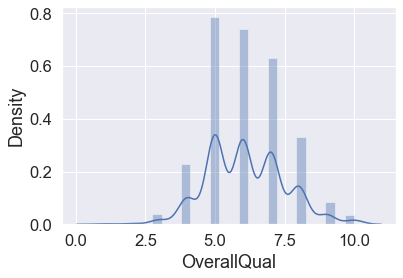

In [24]:
plt.figure()
sns.distplot(house['OverallQual'],color='b')
plt.show()

C:\Users\Adyasha\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: F

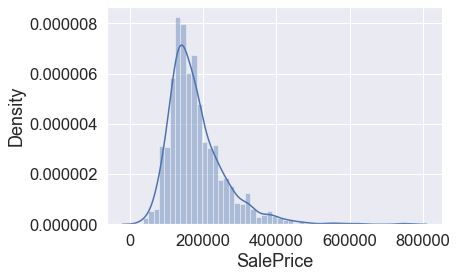

In [25]:
#visualise the dependent variable
plt.figure()
sns.distplot(house['SalePrice'],color='b')
plt.show()

In [26]:
# IQR to remove the outlier
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
        'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch',
        'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'] 

Q1 = house[cols].quantile(0.05)
Q3 = house[cols].quantile(0.95)
IQR = Q3 - Q1

house = house[~((house[cols] < (Q1 - 1.5 * IQR)) |(house[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In a next step, I compare how the outlier treatment has helped with the shape of the data.

C:\Users\Adyasha\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: F

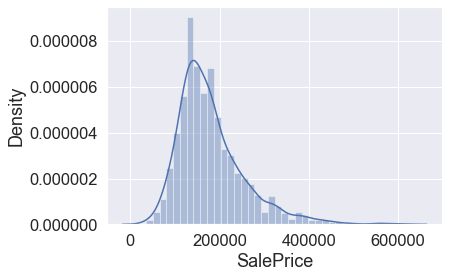

In [27]:
plt.figure()
sns.distplot(house['SalePrice'],color='b')
plt.show()

Some outliers have been removed. However, the target variable is skewed to the right. As a result, it is transformed using log and the result is visualised

C:\Users\Adyasha\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: F

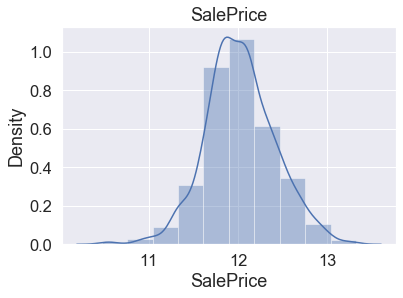

In [28]:
# Visualise the target variable -> SalePrice after transforming the sales price

house['SalePrice'] = np.log1p(house['SalePrice'])

plt.title('SalePrice')
sns.distplot(house['SalePrice'], bins=10)
plt.show()

The dependent variable has been normalised with some residual noise

# 3. EDA

In [29]:
# all numeric (float and int) variables in the dataset
house_num = house.select_dtypes(include=['float64', 'int64'])
house_num.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  SalePrice
0   1          60         65.0     8450            7            5       2003          2003       196.0         706           0        150          856       856       854       1710             1             0         2         1             3             1             8           0       2003.0           2         548           0           61              0            0       2    2008  12.247699
1   2          20         80.0     9600            6            8       1976          1976         0.0         978           0        284         1262      1262         0       1262             0             1         2         0             3             1             6           1       1976.0           2         460         298            0              0            0       5    2007  12.109016
2   3          60         68.0    11250            7            5       2001          2002       162.0         486           0        434          920       920       866       1786             1             0         2         1             3             1             6           1       2001.0           2         608           0           42              0            0       9    2008  12.317171
3   4          70         60.0     9550            7            5       1915          1970         0.0         216           0        540          756       961       756       1717             1             0         1         0             3             1             7           1       1998.0           3         642           0           35            272            0       2    2006  11.849405
4   5          60         84.0    14260            8            5       2000          2000       350.0         655           0        490         1145      1145      1053       2198             1             0         2         1             4             1             9           1       2000.0           3         836         192           84              0            0      12    2008  12.429220

In [30]:
# dropping ID from numerical data and from the general data set as it does not add valuable information for the regression model
house = house.drop(['Id'], axis=1)
house_num = house_num.drop(['Id'], axis=1)
house_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  SalePrice
0          60         65.0     8450            7            5       2003          2003       196.0         706           0        150          856       856       854       1710             1             0         2         1             3             1             8           0       2003.0           2         548           0           61              0            0       2    2008  12.247699
1          20         80.0     9600            6            8       1976          1976         0.0         978           0        284         1262      1262         0       1262             0             1         2         0             3             1             6           1       1976.0           2         460         298            0              0            0       5    2007  12.109016
2          60         68.0    11250            7            5       2001          2002       162.0         486           0        434          920       920       866       1786             1             0         2         1             3             1             6           1       2001.0           2         608           0           42              0            0       9    2008  12.317171
3          70         60.0     9550            7            5       1915          1970         0.0         216           0        540          756       961       756       1717             1             0         1         0             3             1             7           1       1998.0           3         642           0           35            272            0       2    2006  11.849405
4          60         84.0    14260            8            5       2000          2000       350.0         655           0        490         1145      1145      1053       2198             1             0         2         1             4             1             9           1       2000.0           3         836         192           84              0            0      12    2008  12.429220

<Figure size 720x360 with 0 Axes>

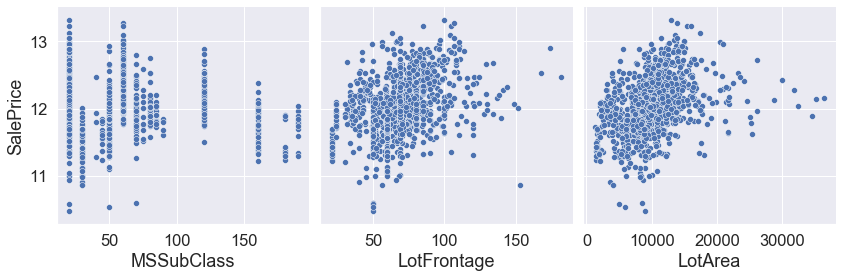

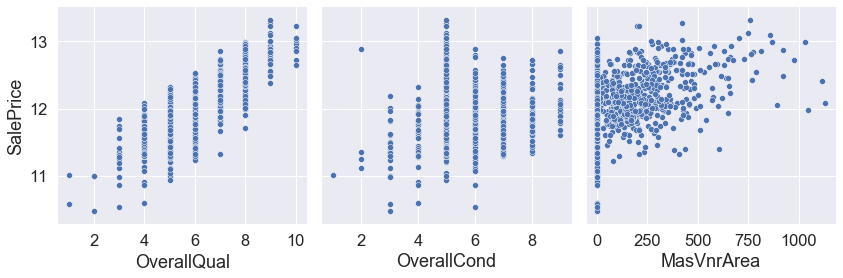

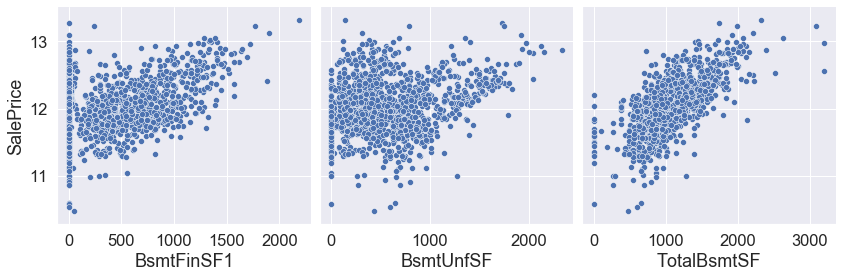

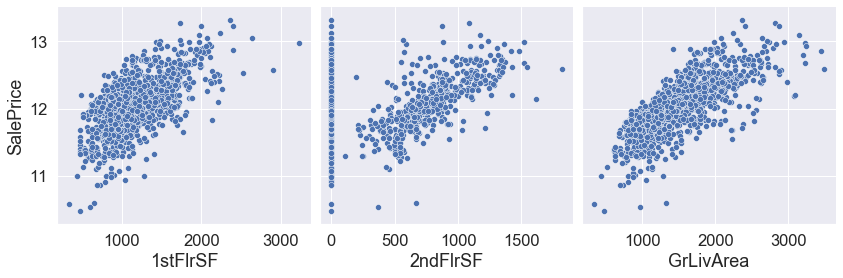

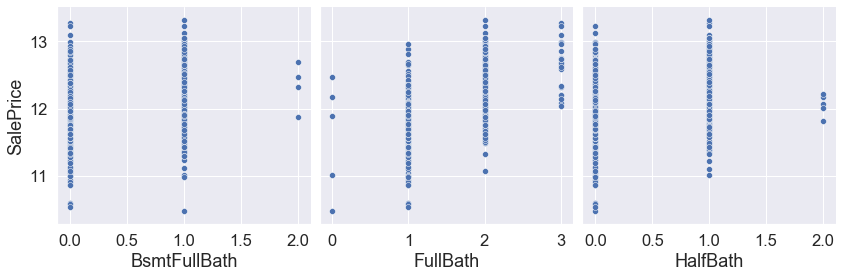

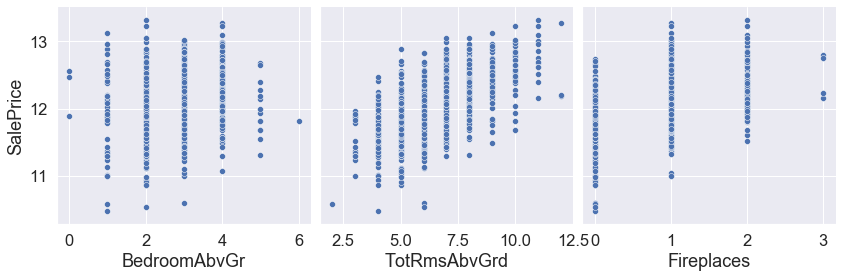

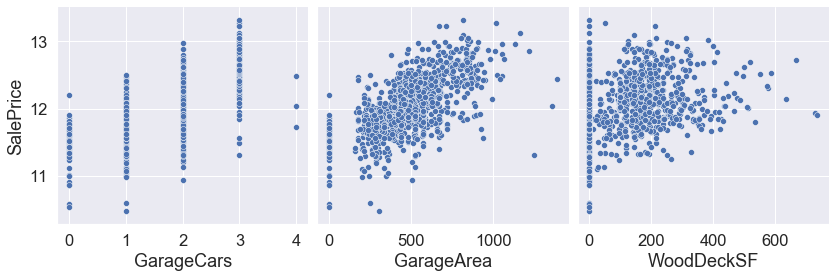

In [31]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(house, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

***
The graphs show relations between selected variables and the dependent variable. 
`GrLivArea` shows the strongest linearity.
***

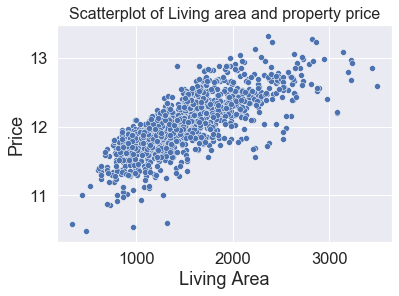

In [32]:
#scatter plot for temperature to count
sns.scatterplot(x='GrLivArea',y='SalePrice' ,data=house)
plt.title('Scatterplot of Living area and property price', fontsize=16)
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.show()

***
### Insight into Living Area and price
While there is no clear correlation line, it appears that the larger the living area, the higher the price will be.
***

## 3.2 Checking correlations

In [33]:
# correlation matrix
cor = house_num.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch    MoSold    YrSold  SalePrice
MSSubClass       1.000000    -0.425547 -0.372512     0.093568    -0.068312   0.118881      0.087547    0.048586   -0.057058   -0.061048  -0.160187    -0.257911 -0.301250  0.309988   0.046370      0.025093     -0.008811  0.102868  0.228561     -0.119048           NaN     -0.044201   -0.011048     0.124770   -0.003834   -0.074741    0.011925     0.024753      -0.041677    -0.023761 -0.017924 -0.030006  -0.033606
LotFrontage     -0.425547     1.000000  0.526729     0.220060    -0.063988   0.133988      0.079399    0.165461    0.135812    0.037861   0.148522     0.321598  0.364081  0.040980   0.313127      0.056625     -0.013850  0.172413  0.043189      0.261870           NaN      0.321784    0.227115     0.080191    0.290353    0.317449    0.091117     0.123925      -0.000104     0.053106  0.012437  0.015370   0.364280
LotArea         -0.372512     0.526729  1.000000     0.158632    -0.028698   0.054476      0.019139    0.136209    0.186061    0.056191   0.074307     0.300370  0.389969  0.088901   0.372146      0.090548      0.045868  0.166575  0.078653      0.274813           NaN      0.352086    0.300367     0.002089    0.283762    0.321187    0.176458     0.147972      -0.013890     0.093827 -0.010367 -0.018141   0.373936
OverallQual      0.093568     0.220060  0.158632     1.000000    -0.134884   0.594482      0.548493    0.415394    0.203358   -0.109144   0.338616     0.552030  0.496834  0.288280   0.622627      0.099497     -0.057984  0.613939  0.260103      0.141440           NaN      0.499850    0.379625     0.528339    0.625290    0.564754    0.225894     0.318338      -0.126046     0.040562  0.086078 -0.007288   0.823638
OverallCond     -0.068312    -0.063988 -0.028698    -0.134884     1.000000  -0.396008      0.042184   -0.136614   -0.037206    0.049467  -0.153006    -0.190745 -0.141005  0.006844  -0.101142     -0.044253      0.134675 -0.212100 -0.071504      0.015941           NaN     -0.058143   -0.050152    -0.337851   -0.205957   -0.173479   -0.024767    -0.068616       0.081037     0.041587  0.001168  0.042487  -0.075506
YearBuilt        0.118881     0.133988  0.054476     0.594482    -0.396008   1.000000      0.611149    0.315152    0.240937   -0.078532   0.178448     0.427143  0.308710  0.054116   0.265671      0.181886     -0.041551  0.553235  0.238276     -0.033658           NaN      0.173813    0.149401     0.796183    0.572425    0.509830    0.226381     0.254271      -0.388191    -0.042973  0.018259 -0.010942   0.616510
YearRemodAdd     0.087547     0.079399  0.019139     0.548493     0.042184   0.611149      1.000000    0.179898    0.107205   -0.100204   0.208382     0.309117  0.263095  0.150882   0.323810      0.110941     -0.020045  0.495403  0.173512     -0.018494           NaN      0.249797    0.093903     0.624350    0.451437    0.390552    0.191182     0.253294      -0.209257    -0.047794  0.026091  0.046591   0.568793
MasVnrArea       0.048586     0.165461  0.136209     0.415394    -0.136614   0.315152      0.179898    1.000000    0.230565   -0.066045   0.123286     0.359799  0.343659  0.141948   0.378636      0.093667      0.002023  0.273787  0.195881      0.096081           NaN      0.291369    0.256418     0.251663    0.375918    0.378886    0.157370     0.131969      -0.102546     0.058424 -0.005703  0.009243   0.440150
BsmtFinSF1      -0.057058     0.135812  0.186061     0.203358    -0.037206   0.240937      0.107205    0.230565    1.000000   -0.056094  -0.544591     0.455673  0.400085 -0.194420   0.125712      0.656119      0.059480  0.057865 -0.039155     -0.113098           NaN      0.024181    0.225

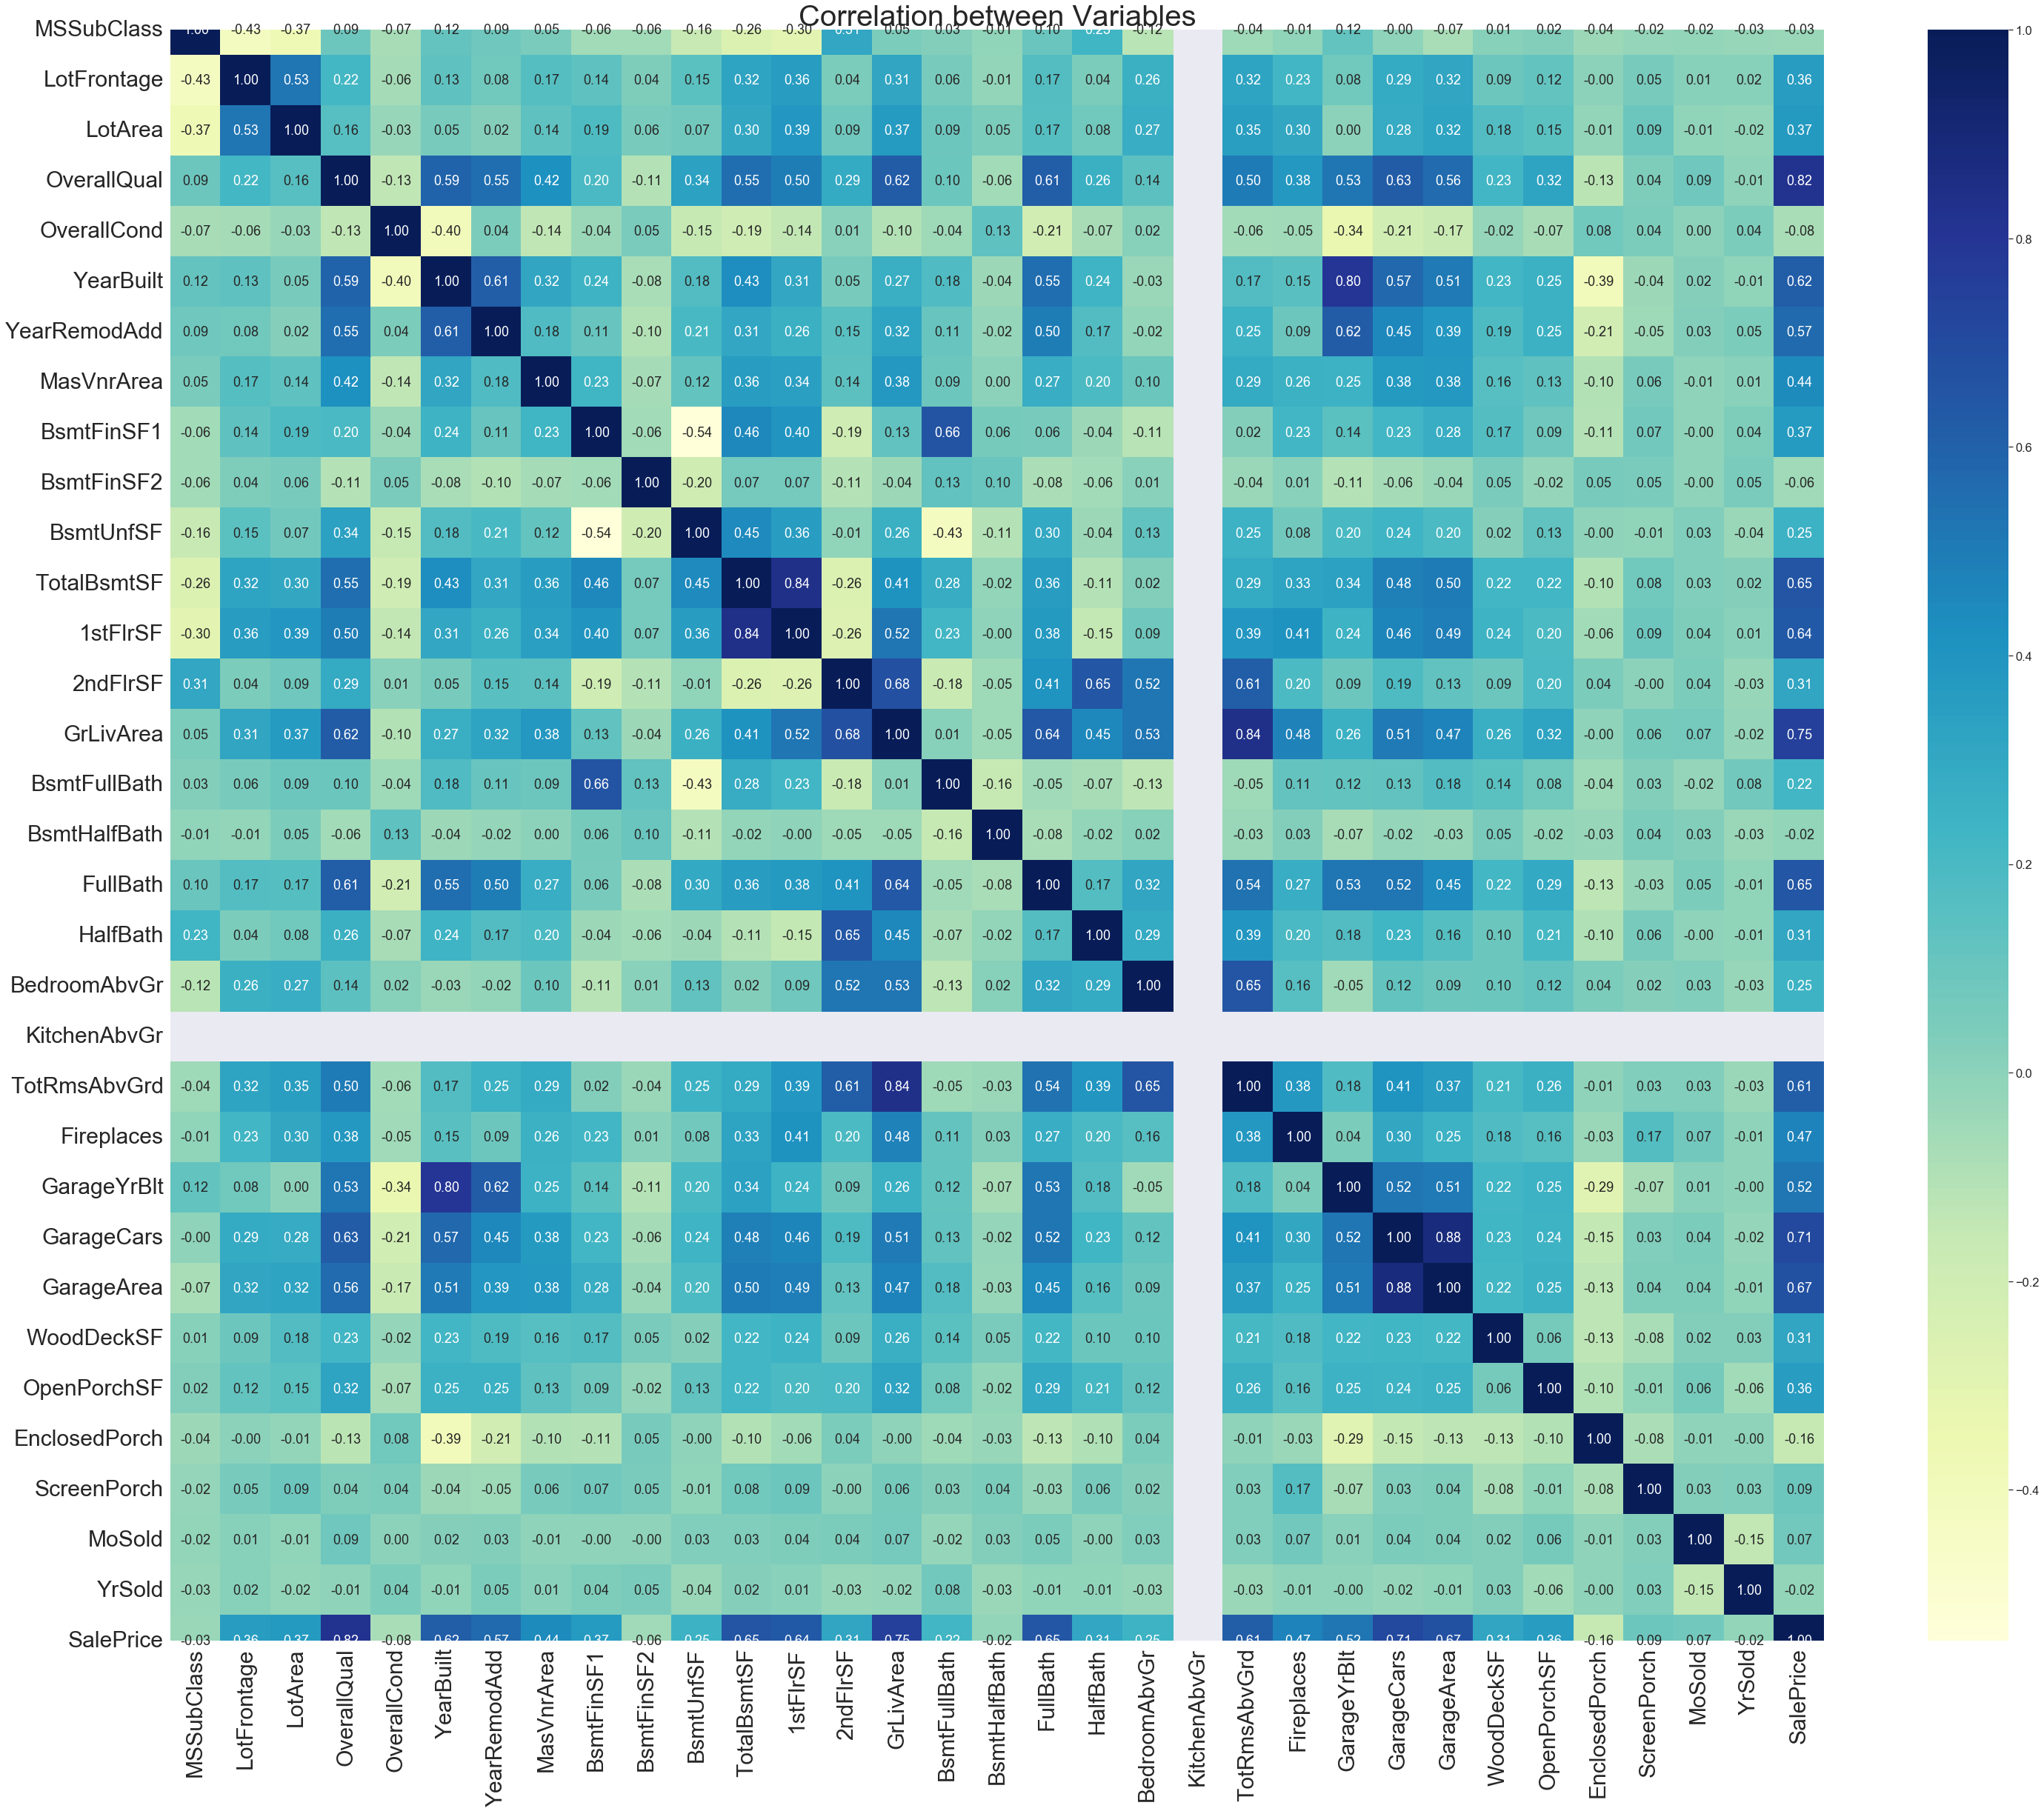

In [34]:
# plotting correlations on a heatmap

plt.figure(figsize=(50,40))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True, fmt='.2f')
plt.title("Correlation between Variables", fontsize=40)
plt.show()

## 3.3 Dropping columns having high correlation

In [35]:
house.drop(['1stFlrSF','TotRmsAbvGrd','GarageArea', 'GarageYrBlt'], axis=1,inplace=True)

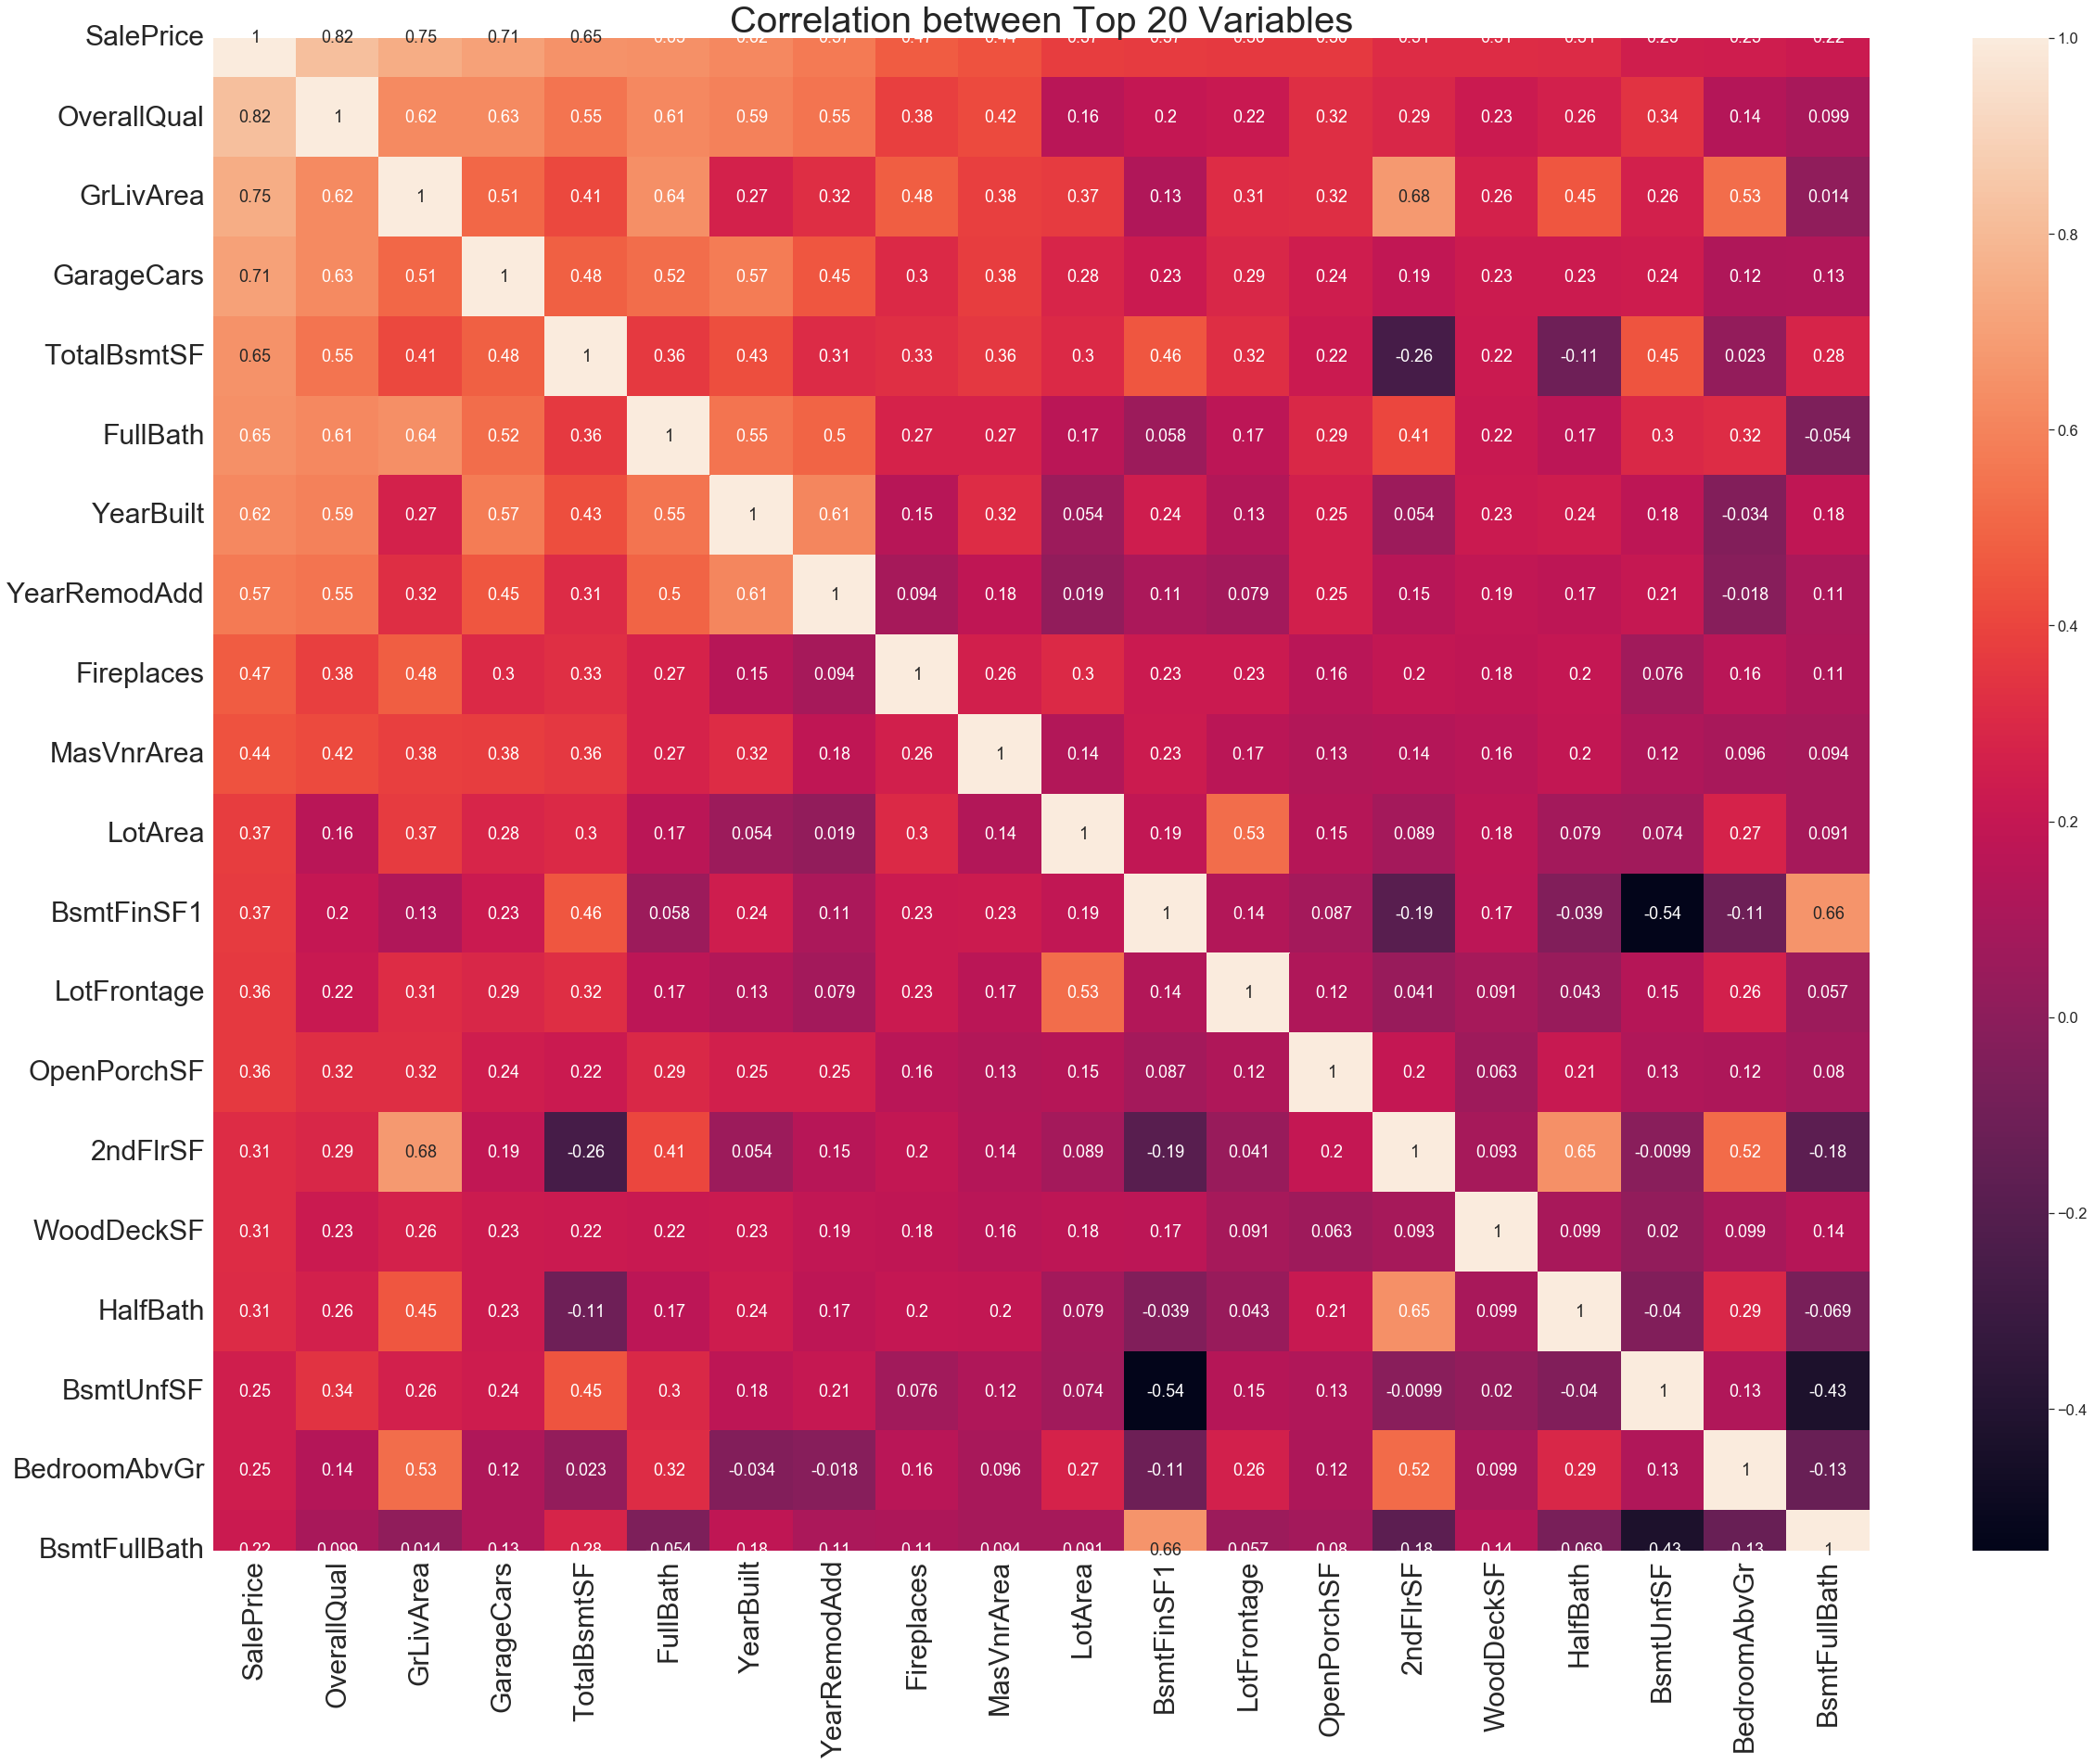

In [36]:
# sales price correlation matrix (visualised the 20 most highly correlated variables to Sale Price)
plt.figure(figsize=(40,30))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
n = 20 # number of variables which have the highest correlation with 'Sales price'

corrmat = house.corr()

cols = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index
#plt.figure(dpi=100)
sns.heatmap(house[cols].corr(),annot=True)
plt.title("Correlation between Top 20 Variables", fontsize=40)
plt.show()

# 4. Data preparation

## 4.1 Creating dummy variables

In [37]:
#Check which columns containg categorical data
house_categorical=house.select_dtypes(include=['object'])
house_categorical.head()


MSZoning Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           No          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ     Attchd          RFn         TA         TA          Y       WD        Normal
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg     MetalSd     MetalSd       None        TA        TA     CBlock       Gd       TA           Gd          ALQ          Unf    GasA        Ex          Y      SBrkr          TA        Typ     Attchd          RFn         TA         TA          Y       WD        Normal
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Mn          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ     Attchd          RFn         TA         TA          Y       WD        Normal
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA       Gd           No          ALQ          Unf    GasA        Gd          Y      SBrkr          Gd        Typ     Detchd          Unf         TA         TA          Y       WD       Abnorml
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Av          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ     Attchd          RFn         TA         TA          Y       WD        Normal

In [38]:
# Convert categorical value into Dummy variables (one hot encoding)
house_dummies=pd.get_dummies(house_categorical,drop_first=True)
house_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Norm  Condition2_PosN  Condition2_RRNn  \
0            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0                    0                     0                 0                1                0                0                0                0                0                0                1                0                0   
1            0            0            1            0            1             0             0             1                0                0                1                 0                  0              1              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0                    0                     1                 1                0                0                0                0                0                0                0                1                0                0   
2            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0                    0                     0                 0                1                0                0                0                0                0                0                1                0                0   
3            0            0            1            0          

## 4.2 Scaling Data

In [39]:
# drop categorical variables from the dataset and save as predictor variable X
X= house.drop(list(house_categorical.columns), axis=1)

In [40]:
#removing response variable from the set
X=X.drop(['SalePrice'], axis=1)

In [41]:
y = house['SalePrice'] # response variable in Y

In [42]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [43]:
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0          60         65.0     8450            7            5       2003          2003       196.0         706           0        150          856       854       1710             1             0         2         1             3             1           0           2           0           61              0            0       2    2008            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0   
1          20         80.0     9600            6            8       1976          1976         0.0         978           0        284         1262         0       1262             0             1         2         0             3             1           1           2         298            0              0            0       5    2007            0            0            1            0            1             0             0             1                0                0                1                 0                  0              1              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0   
2          60         68.0    11250            7            5       2001          2002       162.0         486           0        434          920       866       1786             1             0         2         1             3             1           1           2           0           42              0            0       9    2008            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0   
3          70         60.0     9550            7            5       1915   

In [44]:
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=216)

In [45]:
X.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch    MoSold    YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0    0.142926    -0.214729 -0.301556     0.643699    -0.537949   1.025211      0.848046    0.557189    0.630373   -0.290924  -0.969815    -0.487945  1.229848   0.474147      1.169112     -0.240343  0.861001  1.237099      0.242585           0.0   -0.973602    0.316608   -0.771856     0.249754      -0.360841    -0.272137 -1.592437  0.138990    -0.222566    -0.090435     0.510121    -0.412279     0.060836     -0.157935     -0.077037      0.760644         -0.18527        -0.139817         0.317253         -0.027166          -0.256978       -0.18527      -0.054393          0.615996      -0.213283      -0.072035             -0.038433            -0.109272             -0.209475             -0.122352              2.835489             -0.191565             -0.266627             -0.248724            -0.162773             -0.112677             -0.178783           -0.424449             -0.081741            -0.229772             -0.167486             -0.245364              -0.26821   
1   -0.849686     0.537784 -0.022178    -0.095383     2.183911   0.116681     -0.461085   -0.593667    1.271641   -0.290924  -0.660993     0.538541 -0.791853  -0.456394     -0.835080      4.047877  0.861001 -0.783993      0.242585           0.0    0.617006    0.316608    1.674266    -0.751685      -0.360841    -0.272137 -0.482424 -0.614891    -0.222566    -0.090435     0.510121    -0.412279     0.060836     -0.157935     -0.077037      0.760644         -0.18527        -0.139817         0.317253         -0.027166          -0.256978        5.39753      -0.054393         -1.623388      -0.213283      -0.072035             -0.038433            -0.109272             -0.209475             -0.122352             -0.352673             -0.191565             -0.266627             -0.248724            -0.162773             -0.112677             -0.178783           -0.424449             -0.081741            -0.229772             -0.167486             -0.245364              -0.26821   
2    0.142926    -0.064226  0.378669     0.643699    -0.537949   0.957913      0.799559    0.357551    0.111701   -0.290924  -0.315296    -0.326135  1.258256   0.632007      1.169112     -0.240343  0.861001  1.237099      0.242585           0.0    0.617006    0.316608   -0.771856    -0.062169      -0.360841    -0.272137  0.997592  0.138990    -0.222566    -0.090435     0.510121    -0.412279     0.060836     -0.157935     -0.077037     -1.314675         -0.18527        -0.139817         0.317253         -0.027166          -0.256978       -0.18527      -0.054393          0.615996      -0.213283      -0.072035             -0.038433            -0.109272             -0.209475             -0.122352              2.835489             -0.191565             -0.266627             -0.248724            -0.162773             -0.112677             -0.178783           -0.424449             -0.081741            -0.229772             -0.167486             -0.245364              -0.26821   
3    0.391079    -0.465566 -0.034325     0.643699    -0

## 4.3 Spliting the dataset

In [46]:
# split into train and test
X_train, X_test, y_train,  y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

## 5.1 Linear Model

In [47]:
# Instantiate linear regression
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [48]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

96604729.78896141
[-4.35237984e-02  1.06861195e-02  2.88364443e-02  5.08928843e-02
  4.33650419e-02  4.34450463e-02  8.99231878e-03 -6.50971469e-03
  8.89656893e+10  2.85243694e+10  9.10100046e+10 -8.29594544e+10
 -2.81850594e-03  1.24440874e-01  1.55153915e-02  2.20276490e-03
  1.59527331e-02  1.21169675e-02  1.12186971e-03  1.12454663e+11
  6.31798854e-03  4.18162036e-02  5.99951254e-03  2.41972724e-03
  4.67003992e-03  1.26159538e-02  3.14028339e-04 -1.77866623e-03
  8.30872545e-02  3.52116736e-02  1.62607709e-01  1.33364502e-01
  2.06294487e-03 -1.08098984e-03 -1.48582458e-03  1.40932202e-03
  8.49914551e-03 -8.37898254e-03  1.17111206e-03 -7.54165649e-03
  5.10406494e-03 -5.90562820e-03 -2.98976898e-04 -1.99985504e-03
 -4.13513184e-03 -2.81229019e-02 -6.96182251e-05 -6.91413879e-03
 -5.27381897e-03 -2.35080719e-03 -1.16920471e-02  1.07173920e-02
 -2.67972946e-02 -1.27258301e-02 -9.86289978e-03 -1.62467957e-02
 -1.67717934e-02 -2.80032158e-02 -3.27682495e-03 -1.50890350e-02
 -8.764

In [49]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 train: ', r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 test: ',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1: ',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2: ',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE train: ',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE test: ',mse_test_lr)
metric.append(mse_test_lr**0.5)

r2 train:  0.9559849901666628
r2 test:  -2.6151357640088565e+21
rss1:  6.56822393094231
rss2:  1.4921447165588781e+23
MSE train:  0.00692120540668315
MSE test:  3.666203234788398e+20


The model using all of the features is highly overfitting. R2 is negative only when the chosen model does not follow the trend of the data. In the following step, ridge and lasso are applied to compare the result.

## 5.2 Ridge and Lasso Regression
### 5.2.1 Ridge Regression

In [50]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [51]:
# Printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 100}
-0.08354539471169377


In [52]:
alpha = 100
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-8.88127399e-03,  1.27376531e-02,  2.61363850e-02,  5.68655729e-02,
        3.52405031e-02,  2.09275827e-02,  1.85267226e-02,  9.96181756e-04,
        3.28655553e-02,  2.87803477e-03,  1.16790024e-02,  4.90469350e-02,
        1.75209465e-02,  7.48560083e-02,  1.43169172e-02,  3.33013221e-04,
        2.39696768e-02,  1.67593909e-02,  9.06043528e-03,  0.00000000e+00,
        1.42206997e-02,  3.84266271e-02,  6.83597608e-03,  4.69784103e-03,
        1.17026554e-03,  1.10841452e-02, -1.41248008e-05, -9.86262965e-04,
        6.99675636e-03,  1.50456735e-03,  1.90093430e-02,  8.66457256e-03,
        8.40348002e-03, -4.37379617e-04, -1.74434860e-03, -4.74241872e-04,
        3.72338328e-03, -9.22440587e-03, -1.25387533e-03, -4.58987973e-03,
        6.38975100e-03, -5.69521846e-03, -9.04882318e-04, -3.67766435e-03,
       -9.57398133e-04, -1.38682073e-02,  1.17395401e-03, -2.91229353e-03,
        3.11016983e-03,  2.37823910e-03, -9.62086602e-04,  1.81442816e-02,
       -1.25371371e-02, -

In [53]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9490684386473656
0.8994839618501185
7.600359545148975
5.735246227708598
0.008008808793623787
0.014091514072994098


There is a gap between training and testing score. The training score is slightly lower than the regression model before, but the testing score is much better than the previous version.

### 5.2.2 Lasso Regression

In [54]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.253e-02, tolerance: 1.219e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.001}
-0.08244286061931508


In [56]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [57]:
lasso.coef_

array([-4.14965681e-03,  1.16738609e-02,  2.47961699e-02,  6.56291121e-02,
        4.38462391e-02,  4.38044557e-02,  1.21085712e-02, -5.64890870e-04,
        2.81697915e-02,  0.00000000e+00, -0.00000000e+00,  4.85047418e-02,
        0.00000000e+00,  1.28691890e-01,  1.50025182e-02,  0.00000000e+00,
        1.47714341e-02,  1.07636078e-02,  2.85447952e-04,  0.00000000e+00,
        6.90374854e-03,  3.91504011e-02,  4.43380562e-03,  1.13466082e-03,
        2.22950255e-03,  1.12742906e-02,  0.00000000e+00, -0.00000000e+00,
        1.40265999e-02,  4.96662849e-03,  4.01944633e-02,  2.43690036e-02,
        6.58303125e-03, -0.00000000e+00, -7.97504997e-04, -0.00000000e+00,
        3.30534653e-03, -8.87998726e-03, -0.00000000e+00, -2.94905514e-03,
        4.62679207e-03, -2.50319021e-03,  0.00000000e+00, -2.18504122e-03,
       -0.00000000e+00, -1.35777528e-02,  7.62381090e-04, -6.02073988e-04,
        6.53264039e-03,  1.28977357e-03,  1.57751785e-03,  2.01215193e-02,
       -7.12039699e-03, -

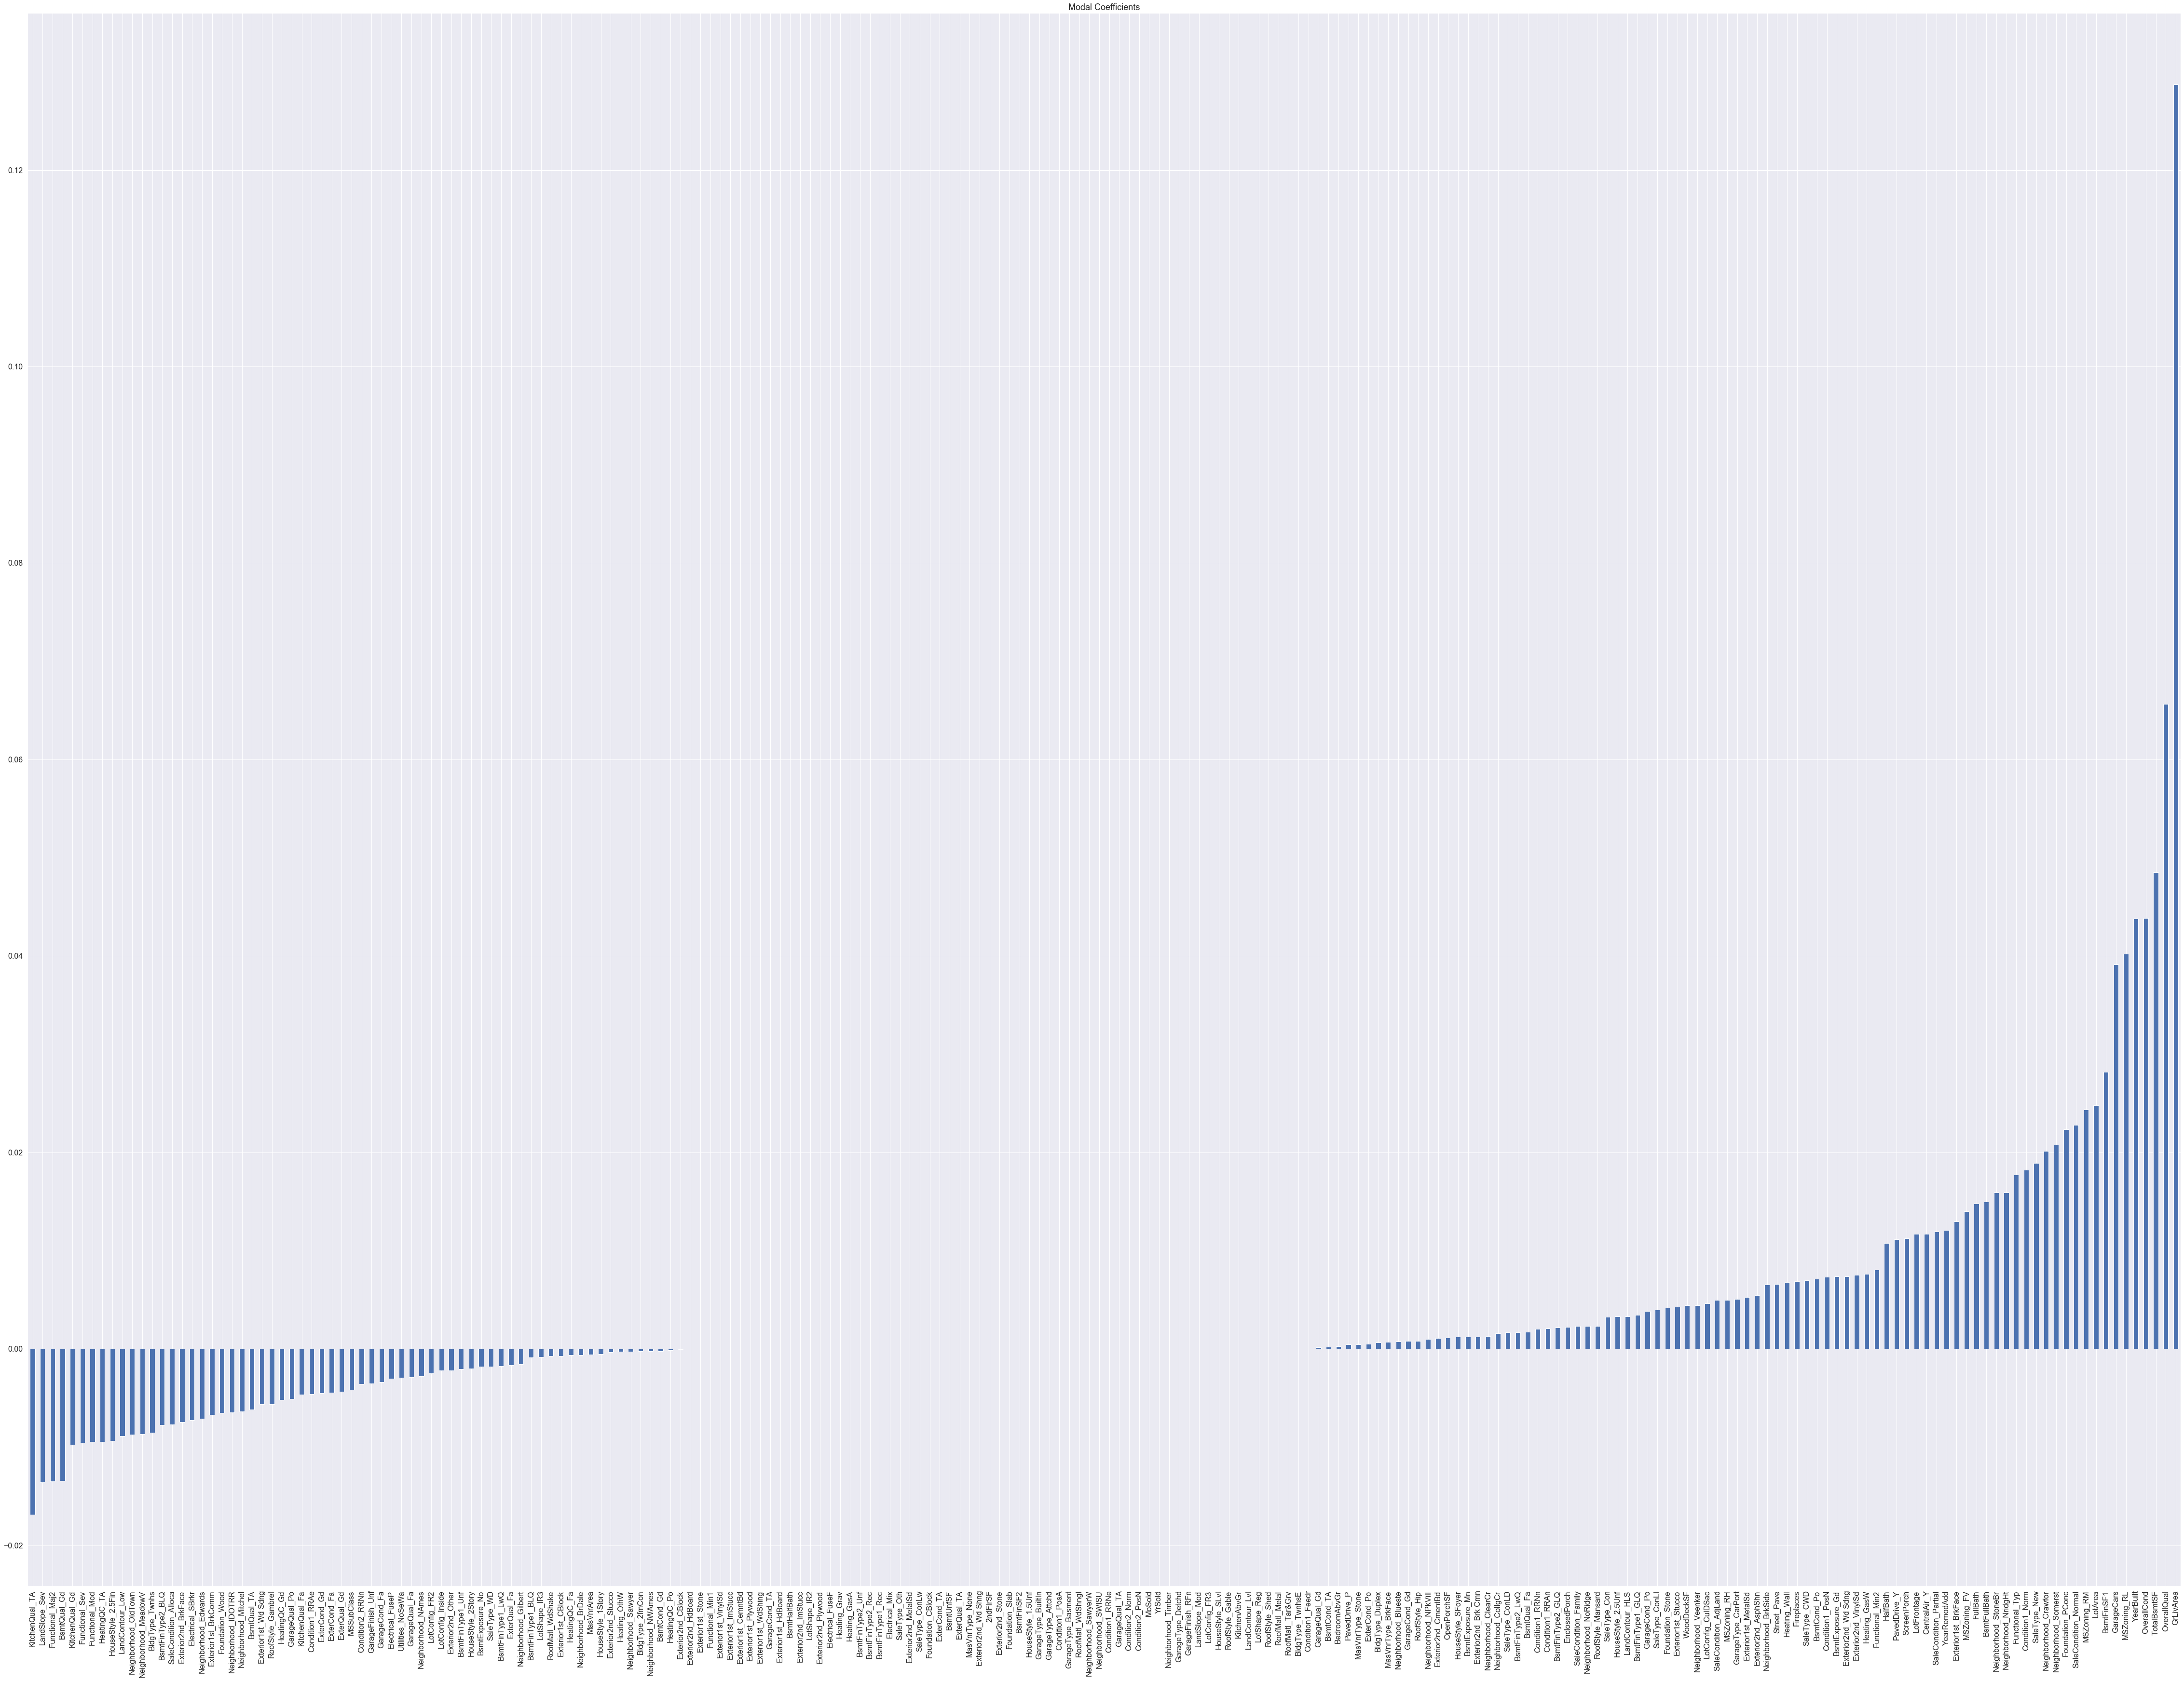

In [58]:
predictors = X_train.columns

coef = pd.Series(lasso.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients', fontsize='16',figsize=(80, 60))

This is a visualisation of the predictor values. The left side denotes negative impact, the right side positive impact. It can be noted that GrLivArea has by far the largest impact.

In [59]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9507423505648409
0.901258786361074
7.350566841335376
5.633978253277247
0.007745592035126845
0.013842698411000607


In [60]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.559850e-01          0.949068          0.950742
1   R2 Score (Test)      -2.615136e+21          0.899484          0.901259
2       RSS (Train)       6.568224e+00          7.600360          7.350567
3        RSS (Test)       1.492145e+23          5.735246          5.633978
4       MSE (Train)       8.319378e-02          0.089492          0.088009
5        MSE (Test)       1.914733e+10          0.118708          0.117655

## 5.3 Predictions and Normality of Residuals

In [61]:
ridge_pred = ridge.predict(X_test)

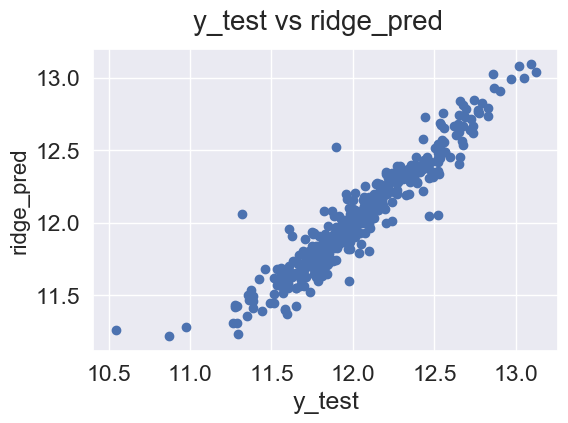

In [62]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

The graph shows that the linear relationship is presented by the model

C:\Users\Adyasha\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: F

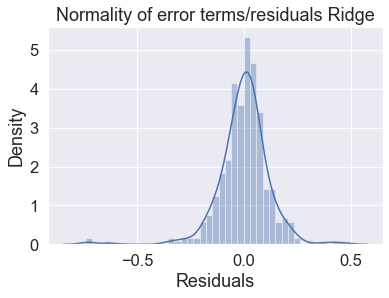

In [63]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals Ridge')
plt.xlabel("Residuals")
plt.show()

The residuals are a bit skewed.

In [64]:
lasso_pred = lasso.predict(X_test)

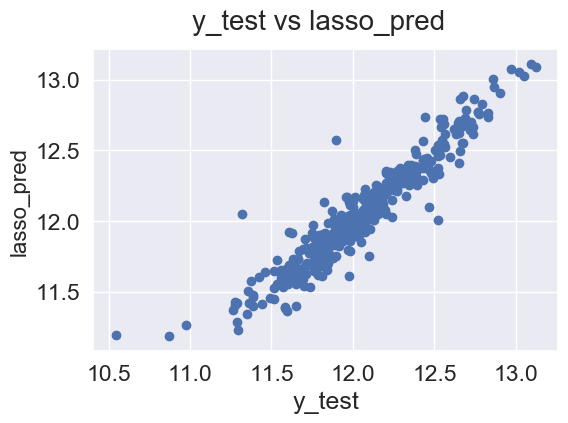

In [65]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

The graph is similar to the Ridge values. There are slightly fewer outliers.

C:\Users\Adyasha\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: F

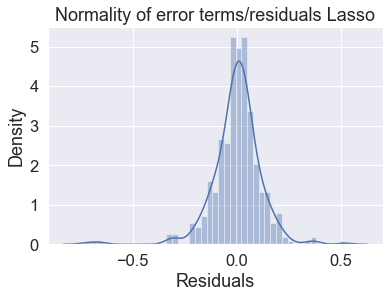

In [66]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals Lasso')
plt.xlabel("Residuals")
plt.show()

The residuals are also skewed, but less than the Ridge Regression one.

## 5.4 Coefficients

In [67]:
betas = pd.DataFrame(index=X_train.columns)

In [68]:
betas.rows = X_train.columns

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [69]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [70]:

betas.head(68)

Linear     Ridge     Lasso
MSSubClass           -4.352380e-02 -0.008881 -0.004150
LotFrontage           1.068612e-02  0.012738  0.011674
LotArea               2.883644e-02  0.026136  0.024796
OverallQual           5.089288e-02  0.056866  0.065629
OverallCond           4.336504e-02  0.035241  0.043846
YearBuilt             4.344505e-02  0.020928  0.043804
YearRemodAdd          8.992319e-03  0.018527  0.012109
MasVnrArea           -6.509715e-03  0.000996 -0.000565
BsmtFinSF1            8.896569e+10  0.032866  0.028170
BsmtFinSF2            2.852437e+10  0.002878  0.000000
BsmtUnfSF             9.101000e+10  0.011679 -0.000000
TotalBsmtSF          -8.295945e+10  0.049047  0.048505
2ndFlrSF             -2.818506e-03  0.017521  0.000000
GrLivArea             1.244409e-01  0.074856  0.128692
BsmtFullBath          1.551539e-02  0.014317  0.015003
BsmtHalfBath          2.202765e-03  0.000333  0.000000
FullBath              1.595273e-02  0.023970  0.014771
HalfBath              1.211697e-02  0.016759  0.010764
BedroomAbvGr          1.121870e-03  0.009060  0.000285
KitchenAbvGr          1.124547e+11  0.000000  0.000000
Fireplaces            6.317989e-03  0.014221  0.006904
GarageCars            4.181620e-02  0.038427  0.039150
WoodDeckSF            5.999513e-03  0.006836  0.004434
OpenPorchSF           2.419727e-03  0.004698  0.001135
EnclosedPorch         4.670040e-03  0.001170  0.002230
ScreenPorch           1.261595e-02  0.011084  0.011274
MoSold                3.140283e-04 -0.000014  0.000000
YrSold               -1.778666e-03 -0.000986 -0.000000
MSZoning_FV           8.308725e-02  0.006997  0.014027
MSZoning_RH           3.521167e-02  0.001505  0.004967
MSZoning_RL           1.626077e-01  0.019009  0.040194
MSZoning_RM           1.333645e-01  0.008665  0.024369
Street_Pave           2.062945e-03  0.008403  0.006583
LotShape_IR2         -1.080990e-03 -0.000437 -0.000000
LotShape_IR3         -1.485825e-03 -0.001744 -0.000798
LotShape_Reg          1.409322e-03 -0.000474 -0.000000
LandContour_HLS       8.499146e-03  0.003723  0.003305
LandContour_Low      -8.378983e-03 -0.009224 -0.008880
LandContour_Lvl       1.171112e-03 -0.001254 -0.000000
Utilities_NoSeWa     -7.541656e-03 -0.004590 -0.002949
LotConfig_CulDSac     5.104065e-03  0.006390  0.004627
LotConfig_FR2        -5.905628e-03 -0.005695 -0.002503
LotConfig_FR3        -2.989769e-04 -0.000905  0.000000
LotConfig_Inside     -1.999855e-03 -0.003678 -0.002185
LandSlope_Mod        -4.135132e-03 -0.000957 -0.000000
LandSlope_Sev        -2.812290e-02 -0.013868 -0.013578
Neighborhood_Blueste -6.961823e-05  0.001174  0.000762
Neighborhood_BrDale  -6.914139e-03 -0.002912 -0.000602
Neighborhood_BrkSide -5.273819e-03  0.003110  0.006533
Neighborhood_ClearCr -2.350807e-03  0.002378  0.001290
Neighborhood_CollgCr -1.169205e-02 -0.000962  0.001578
Neighborhood_Crawfor  1.071739e-02  0.018144  0.020122
Neighborhood_Edwards -2.679729e-02 -0.012537 -0.007120
Neighborhood_Gilbert -1.272583e-02 -0.007546 -0.001572
Neighborhood_IDOTRR  -9.862900e-03 -0.011594 -0.006471
Neighborhood_MeadowV -1.624680e-02 -0.012798 -0.008669
Neighborhood_Mitchel -1.677179e-02 -0.009030 -0.006373
Neighborhood_NAmes   -2.800322e-02 -0.007820 -0.002776
Neighborhood_NPkVill -3.276825e-03  0.001142  0.000976
Neighborhood_NWAmes  -1.508904e-02 -0.002914 -0.000221
Neighborhood_NoRidge -8.764267e-04  0.005409  0.002309
Neighborhood_NridgHt  8.041382e-03  0.016451  0.015932
Neighborhood_OldTown -2.507401e-02 -0.014385 -0.008738
Neighborhood_SWISU   -8.768082e-03 -0.001855 -0.000000
Neighborhood_Sawyer  -1.602268e-02 -0.004018 -0.000261
Neighborhood_SawyerW -8.758545e-03 -0.000715 -0.000000
Neighborhood_Somerst  9.397030e-03  0.015094  0.020754
Neighborhood_StoneBr  1.378822e-02  0.016520  0.015907

In [71]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Lasso'] = lasso.coef_
betas.sort_values(by=['Lasso'], ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Lasso
GrLivArea              0.128692
OverallQual            0.065629
TotalBsmtSF            0.048505
OverallCond            0.043846
YearBuilt              0.043804
MSZoning_RL            0.040194
GarageCars             0.039150
BsmtFinSF1             0.028170
LotArea                0.024796
MSZoning_RM            0.024369
SaleCondition_Normal   0.022812
Foundation_PConc       0.022351
Neighborhood_Somerst   0.020754
Neighborhood_Crawfor   0.020122
SaleType_New           0.018898
Condition1_Norm        0.018219
Functional_Typ         0.017749
Neighborhood_NridgHt   0.015932
Neighborhood_StoneBr   0.015907
BsmtFullBath           0.015003
FullBath               0.014771
MSZoning_FV            0.014027
Exterior1st_BrkFace    0.012979
YearRemodAdd           0.012109
SaleCondition_Partial  0.011948
CentralAir_Y           0.011701
LotFrontage            0.011674
ScreenPorch            0.011274
PavedDrive_Y           0.011178
HalfBath               0.010764
Functional_Min2        0.008049
Heating_GasW           0.007642
Exterior2nd_VinylSd    0.007546
Exterior2nd_Wd Sdng    0.007376
BsmtExposure_Gd        0.007366
Condition1_PosN        0.007315
BsmtCond_Po            0.007120
SaleType_CWD           0.007009
Fireplaces             0.006904
Heating_Wall           0.006813
Street_Pave            0.006583
Neighborhood_BrkSide   0.006533
Exterior2nd_AsphShn    0.005483
Exterior1st_MetalSd    0.005255
GarageType_CarPort     0.005061
MSZoning_RH            0.004967
SaleCondition_AdjLand  0.004949
LotConfig_CulDSac      0.004627
Neighborhood_Veenker   0.004439
WoodDeckSF             0.004434
Exterior1st_Stucco     0.004286
Foundation_Stone       0.004206
SaleType_ConLI         0.004001
GarageCond_Po          0.003868
BsmtFinType1_GLQ       0.003450
LandContour_HLS        0.003305
HouseStyle_2.5Unf      0.003282
SaleType_Con           0.003235
RoofStyle_Mansard      0.002314
Neighborhood_NoRidge   0.002309
SaleCondition_Family   0.002303
EnclosedPorch          0.002230
BsmtFinType2_GLQ       0.002165
Condition1_RRAn        0.002058
Condition1_RRNn        0.002011
BsmtQual_Fa            0.001755
BsmtFinType2_LwQ       0.001690
SaleType_ConLD         0.001685
Neighborhood_CollgCr   0.001578
Neighborhood_ClearCr   0.001290
Exterior2nd_Brk Cmn    0.001246
BsmtExposure_Mn        0.001233
HouseStyle_SFoyer      0.001221
OpenPorchSF            0.001135
Exterior2nd_CmentBd    0.001072
Neighborhood_NPkVill   0.000976
RoofStyle_Hip          0.000824
GarageCond_Gd          0.000819
Neighborhood_Blueste   0.000762
MasVnrType_BrkFace     0.000679
BldgType_Duplex        0.000645
ExterCond_Po           0.000513
MasVnrType_Stone       0.000479
PavedDrive_P           0.000462
BedroomAbvGr           0.000285
BsmtCond_TA            0.000212
GarageQual_Gd          0.000173
Exterior2nd_HdBoard   -0.000000
Exterior2nd_MetalSd    0.000000
Exterior2nd_Wd Shng   -0.000000
Exterior2nd_Plywood   -0.000000
MasVnrType_None       -0.000000
SaleType_Oth           0.000000
ExterQual_TA           0.000000
Exterior2nd_ImStucc   -0.000000
Exterior2nd_Stone      0.000000
BsmtFinType1_Rec      -0.000000
ExterCond_TA           0.000000
Foundation_CBlock     -0.000000
GarageType_Detchd     -0.000000
GarageQual_TA          0.000000
GarageType_BuiltIn     0.000000
GarageType_Basment     0.000000
GarageType_Attchd      0.000000
Electrical_Mix        -0.000000
GarageCond_TA         -0.000000
Electrical_FuseF       0.000000
Heating_Grav           0.000000
Heating_GasA          -0.000000
BsmtFinType2_Unf       0.000000
BsmtFinType2_Rec      -0.000000
GarageFinish_RFn      -0.000000
Foundation_Slab        0.000000
SaleType_ConLw         0.000000
Functional_Min1        0.000000
Exterior1st_Plywood   -0.000000
BldgType_TwnhsE       -0.000000
Condition2_PosN       -0.000000
BsmtHalfBath           0.000000
RoofStyle_Gable       -0.000000
HouseStyle_SLvl        0.000000
Neighborhood_SawyerW  -0.000000
KitchenAbvGr           0.000000
MoSold                 0.000000
Neighborhood_Timber    0.0

## 5.5 Evaluation of the model

The higher values of positive coeeficients suggest a high sale value.
Below are few features:

| Feature	| Description|
|-----------|-----------|
| GrLivArea	| Above grade (ground) living area square feet |
| OverallQual	|  Rates the overall material and finish of the house |
| OverallCond | 	Rates the overall condition of the house |
| TotalBsmtSF | 	Total square feet of basement area |
| GarageArea	| Size of garage in square feet|

## 5.1 Recursive feature elimination (RFE)

In [72]:
y_train_values=y_train.values.reshape(-1,1)

In [73]:
rfe = RFE(lm,n_features_to_select=30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [74]:
#Find the top features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 16),
 ('LotFrontage', False, 44),
 ('LotArea', False, 3),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 65),
 ('MasVnrArea', False, 84),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', False, 150),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 21),
 ('BsmtHalfBath', False, 157),
 ('FullBath', False, 39),
 ('HalfBath', False, 76),
 ('BedroomAbvGr', False, 175),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', False, 90),
 ('GarageCars', False, 2),
 ('WoodDeckSF', False, 111),
 ('OpenPorchSF', False, 152),
 ('EnclosedPorch', False, 134),
 ('ScreenPorch', False, 40),
 ('MoSold', False, 181),
 ('YrSold', False, 163),
 ('MSZoning_FV', False, 11),
 ('MSZoning_RH', False, 13),
 ('MSZoning_RL', False, 9),
 ('MSZoning_RM', False, 10),
 ('Street_Pave', False, 174),
 ('LotShape_IR2', False, 170),
 ('LotShape_IR3', False, 167),
 ('LotShape_Reg', Fals

In the list above, it is noticable that all columns where RFE support is true have equal scores of 1. This means that they could be considered useful features for the model. The usefulness may change throughout the model building progress. This is because RFE aims to remove the worst performing feature. 

In [75]:
# show supported features
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'KitchenAbvGr', 'Condition2_PosN', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Metal', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', 'Exterior1st_CBlock', 'Exterior1st_Stone', 'Exterior2nd_CBlock', 'Exterior2nd_Stone', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA'], dtype='object')

These are the columns that will be used in establishing the model.

In [76]:
# columns were rfe is false
colfls=X_train.columns[~rfe.support_]
colfls

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=186)

These columns will not be considered.

In [77]:
#Check the shape of train and test
# Creating X_train dataframe with RFE selected variables
X_train_rfe=X_train[col]
X_test_rfe=X_test[col]
print(X_train_rfe.shape)
print(X_test_rfe.shape)
print(y_train.shape)
print(y_test.shape)

(949, 30)
(407, 30)
(949,)
(407,)


In [78]:
y_train=y_train.values.reshape(-1,1)

In [79]:
y_train.shape

(949, 1)

In [80]:
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe, has_constant='add')

In [81]:
# running the model
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     363.1
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:04:30   Log-Likelihood:                 564.48
No. Observations:                 949   AIC:                            -1087.
Df Residuals:                     928   BIC:                            -985.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 11.9817      0.004   2734.272      0.000      11.973      11.990
OverallQual            0.1117      0.007     15.141      0.000       0.097       0.126
OverallCond            0.0555      0.005     11.565      0.000       0.046       0.065
YearBuilt              0.1089      0.006     17.026      0.000       0.096       0.121
BsmtFinSF1             0.0534      0.003     16.576      0.000       0.047       0.060
BsmtFinSF2             0.0004      0.005      0.087      0.931      -0.009       0.010
BsmtUnfSF              0.0088      0.003      2.708      0.007       0.002       0.015
TotalBsmtSF            0.0671      0.004     16.375      0.000       0.059       0.075
GrLivArea              0.1690      0.006     29.171      0.000       0.158       0.180
KitchenAbvGr        9.092e-16   3.15e-18    288.768      0.000    9.03e-16    9.15e-16
Condition2_PosN       -0.3255      0.000  -2734.272      0.000      -0.326      -0.325
RoofStyle_Gable        0.0095      0.002      3.924      0.000       0.005       0.014
RoofStyle_Gambrel     -0.0048      0.004     -1.173      0.241      -0.013       0.003
RoofStyle_Hip          0.0137      0.003      5.215      0.000       0.009       0.019
RoofStyle_Mansard      0.0070      0.005      1.555      0.120      -0.002       0.016
RoofStyle_Shed        -0.3255      0.000  -2734.272      0.000      -0.326      -0.325
RoofMatl_Metal        -0.3255      0.000  -2734.272      0.000      -0.326      -0.325
RoofMatl_Tar&Grv      -0.0070      0.005     -1.328      0.185      -0.017       0.003
RoofMatl_WdShngl      -0.4605      0.000  -2734.272      0.000      -0.461      -0.460
Exterior1st_CBlock    -0.0003      0.002     -0.165      0.869      -0.004       0.003
Exterior1st_Stone      0.0043      0.003      1.658      0.098      -0.001       0.009
Exterior2nd_CBlock    -0.0003      0.002     -0.165      0.869      -0.004       0.003
Exterior2nd_Stone      0.0043      0.003      1.658      0.098      -0.001       0.009
GarageQual_Fa          0.0026      0.011      0.232      0.817      -0.020       0.025
GarageQual_Gd          0.0030      0.007      0.430      0.667      -0.011       0.017
GarageQual_Po         -0.0079      0.007     -1.184      0.237      -0.021       0.005
GarageQual_TA          0.0012      0.013      0.097      0.923      -0.024       0.026
GarageCond_Fa         -0.0002      0.012     -0.013      0.990      -0.023       0.023
GarageCond_Gd          0.0021      0.008      0.277      0.782      -0.013       0.017
GarageCond_Po          0.0083      0.009      0.905      0.366      -0.010       0.026
GarageCond_TA       2.542e-05      0.014      0.002      0.999      -0.027       0.027
==============================================================================
Omnibus:                      155.831   Durbin

There is a substantial amount of features that have very high p-values. It is noticeable that this is especially the case for features that address the same areas of the house. Here, it can be observed that the p value for the features addressing the garage are all very high, with some close to 1.

In [82]:

#Drop the constant
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

## 6.2 Checking VIF

In [83]:

# calculate the VIF scores
# function that creates a dataframe that will contain the names of all the feature variables and their respective VIFs
def get_VIF_table(X_train_rfe):
    vif = pd.DataFrame()
    X = X_train_rfe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

get_VIF_table(X_train_rfe)

C:\Users\Adyasha\AppData\Roaming\Python\Python37\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\Adyasha\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Adyasha\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Features   VIF
29       GarageCond_TA   inf
12       RoofStyle_Hip   inf
20  Exterior2nd_CBlock   inf
19   Exterior1st_Stone   inf
18  Exterior1st_CBlock   inf
23       GarageQual_Gd   inf
16    RoofMatl_Tar&Grv   inf
24       GarageQual_Po   inf
25       GarageQual_TA   inf
13   RoofStyle_Mansard   inf
11   RoofStyle_Gambrel   inf
22       GarageQual_Fa   inf
10     RoofStyle_Gable   inf
26       GarageCond_Fa   inf
27       GarageCond_Gd   inf
6          TotalBsmtSF   inf
5            BsmtUnfSF   inf
4           BsmtFinSF2   inf
3           BsmtFinSF1   inf
28       GarageCond_Po   inf
21   Exterior2nd_Stone   inf
0          OverallQual  2.83
2            YearBuilt  2.20
7            GrLivArea  1.76
1          OverallCond  1.28
17    RoofMatl_WdShngl  0.00
14      RoofStyle_Shed  0.00
9      Condition2_PosN  0.00
15      RoofMatl_Metal  0.00
8         KitchenAbvGr   NaN

In [84]:
lm=LinearRegression()

lm.fit(X_train_rfe,y_train)

y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

## 6.3 Ridge Regression with RFE

In [85]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [86]:
# Printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 20}
-0.09879858564003219


In [87]:
alpha = 20
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([[ 1.13067243e-01,  5.31103909e-02,  1.05610100e-01,
         5.31512509e-02,  3.03774797e-04,  9.20038662e-03,
         6.71970413e-02,  1.65121387e-01,  0.00000000e+00,
        -4.24350863e-31, -1.19147231e-03, -7.11093898e-03,
         3.53847383e-03,  5.39011760e-03,  0.00000000e+00,
         0.00000000e+00, -8.66930374e-03, -1.69740345e-30,
        -3.48038510e-04,  4.36793728e-03, -3.48038510e-04,
         4.36793728e-03,  1.69898541e-03,  3.07890643e-03,
        -7.73041774e-03,  8.37935677e-04, -8.27846398e-04,
         2.02079551e-03,  7.17713549e-03, -2.08804451e-04]])

In [88]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)



0.8865536841704261
0.8625065942144287


The training accuracy is lower than what was generated before. However, the gap between training and testing data is lower. Depending on the business situation, this may be a better model to use.